###**Research Methods for Business Analytics Group Assignment**
#**HR Dataset Analysis**
###Group 2 - TXB
71119 Margarida Passos da Cunha\
71819 Behnia Ghadiani\
72561 Riccardo Giuliano Bertolini

## **Table of Content**

- [1. Executive Summary](#1-Executive-Summary)

- [2. Introduction](#2-Introduction)
  - [2.1 The dataset](#21-The-dataset)
  - [2.2 Research Question](#22-Research-Question)

- [3. Exploratory data analysis](#3-Exploratory-data-analysis)
  - [3.1 Data Cleaning](#31-Data-Cleaning)
  - [3.2 Variables in the data set](#32-Variables-in-the-data-set)
    - [3.2.1 Variable Types](#321-Variable-Types)
    - [3.2.2 Numerical variables](#322-Numerical-variables)
    - [3.2.3 Categorical variables](#323-Categorical-variables)
  - [3.3 Descriptive Statistics](#33-Descriptive-Statistics)
    - [3.3.1 Summary Statistics Table](#331-Summary-Statistics-Table)
    - [3.3.2 Univariate Analysis](#332-Univariate-Analysis)
    - [3.3.3 Bivariate analysis](#333-Bivariate-analysis)
    - [3.3.4 Multivariate analysis](#334-Multivariate-analysis)

- [4. Method 1 – Logistic Regression](#4-Method-1--Logistic-Regression)
  - [4.1 Creating the model](#41-Creating-the-model)
  - [4.2 Interpreting the outcome](#42-Interpreting-the-outcome)
    - [4.2.1 Goodness-of-fit](#421-Goodness-of-fit)
    - [4.2.2 Hypothesis testing – Odds ratio](#422-Hypothesis-testing--Odds-ratio)
  - [4.3 Model 1 – final conclusions](#43-Model-1--final-conclusions)

- [5. Method 2 – Factor analysis](#5-Method-2--Factor-analysis)
  - [5.1 Define relevant variables](#51-Define-relevant-variables)
  - [5.2 Exploratory factor analysis](#52-Exploratory-factor-analysis)
    - [5.2.1 Dataset with non-transformed data](#521-Dataset-with-non-transformed-data)
    - [5.2.2 Dataset with log-transformed data](#522-Dataset-with-log-transformed-data)
    - [5.2.3 Dataset with standardized Variables](#523-Dataset-with-standardized-Variables)
    - [5.2.4 Dataset without non-revealing Variables](#524-Dataset-without-non-revealing-Variables)
    - [5.2.5 Compute factor scores and assess factor reliability](#525-Compute-factor-scores-and-assess-factor-reliability)
  - [5.3 Hypotheses testing – Logistic Regression with the Factors](#53-Hypotheses-testing--Logistic-Regression-with-the-Factors)
  - [5.4 Conclusion](#54-Conclusion)

- [6. Reflection on use of AI](#6-Reflection-on-use-of-AI)

- [7. Conclusion](#7-Conclusion)


# **1. Executive Summary**

This project uses the **HR Employee Attrition dataset**, which contains data on 1,470 employees across 35 variables covering demographics, compensation, satisfaction, and career development. The dataset includes both quantitative and categorical variables such as *MonthlyIncome*, *StockOptionLevel*, *PercentSalaryHike*, *YearsAtCompany*, *JobLevel*, *YearsSinceLastPromotion*, *WorkLifeBalance*, and *EnvironmentSatisfaction*. Its richness allows for a comprehensive analysis of how individual, professional, and financial factors relate to employee attrition, defined as whether an employee has left or stayed in the organization.

The **research question** guiding this analysis is: *To what extent can career development, compensation, and satisfaction factors predict employee attrition in the organization?* Employee turnover carries substantial costs, so identifying actionable predictors helps design effective retention policies focused on compensation, progression, and workplace experience.

**Method 1 (Logistic Regression)** explores the relationship between compensation-related variables (*MonthlyIncome*, *StockOptionLevel*, and *PercentSalaryHike*) and the likelihood of employee attrition, with *Attrition* serving as the binary dependent variable. The results indicate that **the effect is primarily driven by StockOptionLevel**, which emerges as the main predictor of attrition. While MonthlyIncome is statistically significant, its impact on attrition is relatively weak. In contrast, PercentSalaryHike shows no statistical significance, suggesting that salary increases do not play a meaningful role in explaining attrition within this sample.

**Method 2 (Factor Analysis)** reduces the dimensionality of career development, compensation, and satisfaction variables to uncover latent structures that capture underlying patterns in the data. The analysis reveals that these variables can be summarized by a single dominant pattern related to **tenure** and **seniority**, which shows a statistically significant negative relationship with attrition. This pattern includes variables initially linked to the domains of career development and compensation. In contrast, variables associated with satisfaction did not load meaningfully onto any factor and were therefore excluded from the final model.

Since the variables associated could not be included into our factor model, we could not assess their influence on attrition. From the variables investigated, this project identifies **work experience and career tenure as the most influential factors in explaining employee attrition, as well as Stock Option Level as the most influential compensation variable**. The findings show that long-term financial incentives, such as stock options, and accumulated experience within the company are key to retaining employees, while short-term pay increases has no signifcant impact. From a **managerial perspective**, organizations should focus on transparent compensation systems, fair promotion policies, and retention strategies that reward tenure and experience to reduce turnover. However, the study is **limited** by its correlational nature, the use of data from a single company, and the absence of longitudinal or unobserved variables such as leadership quality or team climate, which restricts causal inference and generalizability. **Future research** should therefore explore causal mechanisms using panel data, include cross-company datasets, and incorporate survey-based or more granular satisfaction measures to better understand how compensation, career progression, and workplace relationships interact to shape employee retention.

# **2. Introduction**

This chapter sets the stage for our analysis.
In Section 2.1 we take a guided tour of the HR dataset, describing the variables present in the dataset and importing the dataset to the notebook.
In Section 2.2 we turn to the research question, and the underlying hypotheses.

## 2.1 The dataset

Employee attrition is a strategic issue: every exit triggers recruiting and onboarding costs, productivity ramp-down, knowledge loss, and morale ripple effects. For HR and line managers, understanding which factors are associated with leaving, and how they co-move, is essential to prioritize actionable levers (e.g., overtime policies, role design, compensation progression, manager practices) instead of generic, costly programs.

This dataset provides 1,470 individual-level HR records with the binary outcome Attrition (Yes/No), allowing us to quantify associations between leaving the company and job experience, compensation and growth, tenure and career path, and  working conditions. Insights from this analysis can directly inform retention strategies, workforce planning, and budgeting for targeted interventions rather than across-the-board measures.


**Variables Overview (HR Employee Attrition Dataset)**

- **Demographics**
  - *Age*: employee’s age.
  - *Gender*: male/female; useful for high-level turnover trends.
  - *Education*: highest education level attained.

- **Employee Satisfaction**
  - *EnvironmentSatisfaction*: perceived quality/comfort of the work environment (1–4 scale).
  - *WorkLifeBalance*: balance between work and personal life (1–4 scale).
  - *JobSatisfaction*: overall satisfaction with one’s role (1–4 scale).
  - *RelationshipSatisfaction*: quality of relationships at work (1–4 scale).

- **Career Development**
  - *Department* : functional area (e.g., Sales, R&D, HR).
  - *TotalWorkingYears* : total years of professional experience.
  - *YearsAtCompany* : tenure within the current company.
  - *YearsWithCurrManager* : time working with the current manager.
  - *YearsSinceLastPromotion* : years since the last promotion.
  - *JobLevel* : seniority level (entry to executive).
  - *TrainingTimesLastYear* : number of formal trainings in the last year.

- **Compensation**
  - *MonthlyIncome* : monthly salary.
  - *StockOptionLevel* : equity/stock option tier.
  - *PercentSalaryHike* : % salary increase in the last year.

- **Key Outcome**
  - *Attrition* (Yes/No): whether the employee left the company. This is the **dependent variable** we aim to explain; links between satisfaction, career development, and compensation help identify the strongest drivers of turnover risk.


#### **Importing the data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


In [ ]:
# Import the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
import math
import statsmodels.formula.api as smf



df_original = pd.read_csv("HR-Employee-Attrition.csv")

#Create a copy of the original dataset to work with, so that the original ramains intact
df = df_original.copy()


## 2.2 Research Question

One of the key challenges organizations face today is understanding and managing the factors that drive employee attrition, particularly those related to career development, compensation, and job satisfaction. In a competitive business environment, retaining skilled and motivated employees is essential for sustaining productivity and reducing recruitment and training costs (Hausknecht & Trevor, 2011). Research has shown that financial incentives, growth opportunities, and satisfaction with one’s role are among the most influential predictors of employee turnover (Mitchell et al., 2001; Allen et al., 2010).

Using the HR Employee Attrition dataset, this analysis aims to explore how compensation-related variables (such as MonthlyIncome, StockOptionLevel, and PercentSalaryHike), career development indicators (including YearsAtCompany, JobLevel, and YearsSinceLastPromotion), and multiple satisfaction measures (like WorkLifeBalance and JobSatisfaction) contribute to the likelihood of attrition. By examining these dimensions jointly, we seek to identify which aspects most strongly predict whether an employee remains with or leaves the organization.

Therefore, this study addresses the research question: **To what extent can career development, compensation, and satisfaction factors predict employee attrition in the organization?**

To address this research question, the following hypothesis have been formulated.

**Hypothesis 1:**

**H0₁**: Monthly income, stock option level and percent salary hike have no significant effect on the likelihood of employee attrition.

**H1₁**: Monthly income, stock option level and percent salary hike have significant effect on the likelihood of employee attrition.

To test this hypothesis we will perform a **logistic regression**. The predictor variables are compensation-related variables, such as *monthly income*, *stock option level* and *percent salary hike* . The dependent variable is the likelihood of *attrition*.


**Hypothesis 2**

**H0**: The fields of Career & Development, Compensation and Satisfaction have no significant effect on the likelihood of employee attrition
**H1**: The fields of Career & Development, Compensation and Satisfaction have significant effect on the likelihood of employee attrition

To test this hypothesis we will perform a **factor analysis**, exploring if variables we associate with these dimensions actually form a pattern and if the identified patterns will have an effect on *attrition*.

The findings from this analysis can provide valuable insights for HR practitioners to develop targeted retention strategies, focusing on equitable compensation structures, clear career progression paths, and improved satisfaction with work conditions and which ultimately helps organizations enhance employee engagement and long-term retention (Kumar & Mathimaran, 2017; Hom et al., 2017).

# **3. Exploratory data analysis**

In this section, we carry out Exploratory Data Analysis (EDA) to inspect the dataset’s key variables, reveal patterns, and develop a thorough understanding of the data. We begin by importing and cleaning the dataset, then examine its structure and present summary statistics, visualizations, and a correlation analysis.

## **3.1 Data Cleaning**

**Overview of the data: total values, null values and unique values**

The HR Employee Attrition dataset is first cleaned by checking for missing data, handling redundant variables, and encoding variables for consistency. Only variables most relevant to the research questions on attrition are retained, focusing on Career and Development, Compensation, and Demographics, resulting in a clean dataset prepared for the EDA.

In [ ]:
# Build summary table
summary_table = pd.DataFrame({
    "Total Values": df.count(),
    "Null Values": df.isna().sum(),
    "Unique Values": df.nunique()})

# Display the summary table
summary_table.head(len(summary_table))

,Total Values,Null Values,Unique Values
Age,1470,0,43
Attrition,1470,0,2
BusinessTravel,1470,0,3
DailyRate,1470,0,886
Department,1470,0,3
DistanceFromHome,1470,0,29
Education,1470,0,5
EducationField,1470,0,6
EmployeeCount,1470,0,1
EmployeeNumber,1470,0,1470


From this table, we can conclude that there is no missing data in the dataset, since all variables have complete records across the 1470 observations.

**Handling redundant data**

In [ ]:
# Redundant columns - variables with only one unique value

one_unique_vars = summary_table[summary_table["Unique Values"] == 1].index.tolist()
print(one_unique_vars)


['EmployeeCount', 'Over18', 'StandardHours']


In [ ]:
# Drop the columns with just one unique value
df = df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], errors="ignore")

**Convenience encoding**

In [ ]:
# Transform attrition from string to numeric (Yes = 1; No = 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

**Variable Selection**

In this step, we restrict the dataset to a subset of variables that are most relevant to our analysis. By focusing only on attributes that are theoretically or practically related to the research question, we simplify the dataset, reduce noise, and make the analysis more interpretable. Columns that do not contribute meaningfully to explaining or predicting the outcome of interest are excluded.

The variables we keep for further analysis are:

**Attrition**

**Demographics** - Age, Gender, Education

**Employee Satisfaction** - EnvironmentSatisfaction, WorkLifeBalance, JobSatisfaction, JobInvolvement, RelationshipSatisfaction

**Career Development** - Department, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager, YearsSinceLastPromotion, JobLevel, TrainingTimesLastYear

**Compensation** - MonthlyIncome, StockOptionLevel, PercentSalaryHike

In [ ]:
# Keep only variables we’ll analyze
vars_used = ['Attrition', 'Age', 'Gender', 'Education',
    'EnvironmentSatisfaction', 'WorkLifeBalance', 'JobSatisfaction', "JobInvolvement",  'RelationshipSatisfaction',
    'Department', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager',
    'YearsSinceLastPromotion', 'JobLevel', 'TrainingTimesLastYear',
    'MonthlyIncome', 'StockOptionLevel', 'PercentSalaryHike']

df = df[vars_used].copy()


Now, the dataset is cleaned for further analysis.

In [ ]:
df.head(10)

,Attrition,Age,Gender,Education,EnvironmentSatisfaction,WorkLifeBalance,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,Department,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,YearsSinceLastPromotion,JobLevel,TrainingTimesLastYear,MonthlyIncome,StockOptionLevel,PercentSalaryHike
0,1,41,Female,2,2,1,4,3,1,Sales,8,6,5,0,2,0,5993,0,11
1,0,49,Male,1,3,3,2,2,4,Research & Development,10,10,7,1,2,3,5130,1,23
2,1,37,Male,2,4,3,3,2,2,Research & Development,7,0,0,0,1,3,2090,0,15
3,0,33,Female,4,4,3,3,3,3,Research & Development,8,8,0,3,1,3,2909,0,11
4,0,27,Male,1,1,3,2,3,4,Research & Development,6,2,2,2,1,3,3468,1,12
5,0,32,Male,2,4,2,4,3,3,Research & Development,8,7,6,3,1,2,3068,0,13
6,0,59,Female,3,3,2,1,4,1,Research & Development,12,1,0,0,1,3,2670,3,20
7,0,30,Male,1,4,3,3,3,2,Research & Development,1,1,0,0,1,2,2693,1,22
8,0,38,Male,3,4,3,3,2,2,Research & Development,10,9,8,1,3,2,9526,0,21
9,0,36,Male,3,3,2,3,3,2,Research & Development,17,7,7,7,2,3,5237,2,13


## **3.2 Variables in the data set**

### 3.2.1 Variable Types

In [ ]:
# Understanding which types of variables we have on our data set
df[vars_used].dtypes

,0
Attrition,int64
Age,int64
Gender,object
Education,int64
EnvironmentSatisfaction,int64
WorkLifeBalance,int64
JobSatisfaction,int64
JobInvolvement,int64
RelationshipSatisfaction,int64
Department,object


**Classification of the variables**

These lists categorize the dataset’s variables into **numerical** (further divided into *discrete* and *continuous*) and **categorical** types.  
This classification allows us to handle each group efficiently in later analyses.

A particular case worth noting is **PercentSalaryHike**, which, although stored as whole numbers, represents a **continuous ratio variable** (the percentage increase in salary). Since it can theoretically take any real value within a range and describes a continuous process rather than a count, it is treated as a **continuous variable** in the analysis.

We also grouped them in clusters (demographics, employee satisfaction, career development and compensation) so that they could be easily accessed.

*Classification by type*

In [ ]:
# Numerical varables
num_vars = [
    "YearsAtCompany", "YearsSinceLastPromotion", "JobLevel", "TrainingTimesLastYear",
    "YearsWithCurrManager", "MonthlyIncome", "StockOptionLevel",
    "PercentSalaryHike", "TotalWorkingYears", "Age", "Education",
    "EnvironmentSatisfaction","WorkLifeBalance", "JobSatisfaction", "RelationshipSatisfaction"]

discrete_vars = ["JobLevel", "TrainingTimesLastYear",
   "StockOptionLevel", "Education", "EnvironmentSatisfaction",
   "WorkLifeBalance", "JobSatisfaction", "JobInvolvement", "RelationshipSatisfaction"]

continuous_vars = ["Age", "YearsAtCompany", "YearsSinceLastPromotion",
                    "YearsWithCurrManager", "TotalWorkingYears", "MonthlyIncome", "PercentSalaryHike"]

# Categorical variables
cat_vars = ["Attrition", "Department", "Gender"]

*Classification by clusters*

In [ ]:
# Demographics
demographics_vars = ['Age', 'Gender', 'Education']

# Employee Satisfaction
satisfaction_vars = ['EnvironmentSatisfaction','WorkLifeBalance','JobSatisfaction', "JobInvolvement", 'RelationshipSatisfaction']

# Career Development
career_development_vars = ['Department','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','YearsSinceLastPromotion','JobLevel','TrainingTimesLastYear']

# Compensation
compensation_vars = ['MonthlyIncome', 'StockOptionLevel', 'PercentSalaryHike']

### 3.2.2 Numerical variables

**Discrete variables**

In [ ]:
for col in discrete_vars:
    print(f"{col}: {np.sort(df[col].unique())}\n")

JobLevel: [1 2 3 4 5]

TrainingTimesLastYear: [0 1 2 3 4 5 6]

StockOptionLevel: [0 1 2 3]

Education: [1 2 3 4 5]

EnvironmentSatisfaction: [1 2 3 4]

WorkLifeBalance: [1 2 3 4]

JobSatisfaction: [1 2 3 4]

JobInvolvement: [1 2 3 4]

RelationshipSatisfaction: [1 2 3 4]



The discrete variables capture categorical or count-based information such as job level, training participation, stock option allocation, salary increases, education, and environment satisfaction.

**Continuous variables**

In [ ]:
summary = []

for i in continuous_vars:
    summary.append({"Variable": i,
                    "Unique Values": df[i].nunique(),
                    "Min": df[i].min(),
                    "Max": df[i].max()})

summary_df = pd.DataFrame(summary)
summary_df


,Variable,Unique Values,Min,Max
0,Age,43,18,60
1,YearsAtCompany,37,0,40
2,YearsSinceLastPromotion,16,0,15
3,YearsWithCurrManager,18,0,17
4,TotalWorkingYears,40,0,40
5,MonthlyIncome,1349,1009,19999
6,PercentSalaryHike,15,11,25


The continuous variables highlight a wide spread in age, income, and tenure, reflecting differences in workforce demographics, compensation, and career progression within the organization.

### 3.2.3 Categorical variables

In [ ]:
for col in cat_vars:
    print(df[col].value_counts())
    print()

Attrition
0    1233
1     237
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64



Most employees are in Research & Development, the workforce is slightly male-dominated, and attrition affects only a small share of staff.

## **3.3 Descriptive Statistics**

### 3.3.1 Summary Statistics Table

In [ ]:
# Basic descriptive statistics
display(df[num_vars].describe().T.round(2))


,count,mean,std,min,25%,50%,75%,max
YearsAtCompany,1470.0,7.01,6.13,0.0,3.0,5.0,9.0,40.0
YearsSinceLastPromotion,1470.0,2.19,3.22,0.0,0.0,1.0,3.0,15.0
JobLevel,1470.0,2.06,1.11,1.0,1.0,2.0,3.0,5.0
TrainingTimesLastYear,1470.0,2.80,1.29,0.0,2.0,3.0,3.0,6.0
YearsWithCurrManager,1470.0,4.12,3.57,0.0,2.0,3.0,7.0,17.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.0,4919.0,8379.0,19999.0
StockOptionLevel,1470.0,0.79,0.85,0.0,0.0,1.0,1.0,3.0
PercentSalaryHike,1470.0,15.21,3.66,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,1470.0,11.28,7.78,0.0,6.0,10.0,15.0,40.0
Age,1470.0,36.92,9.14,18.0,30.0,36.0,43.0,60.0


This table reports basic descriptive statistics for all numeric variables in the HR dataset, including count, mean, standard deviation, minimum, quartiles (25, 50, 75), and maximum.
It summarizes central tendency and dispersion, helping us see typical ranges and potential skew or outliers.

In order to develop further insights on variables and their distribution, box plots and histograms are graphed and discussed below.

To gain deeper insights into the variables and their distributions, we present and discuss boxplots and histograms below.

### 3.3.2 Univariate Analysis

#### Categorical Variables

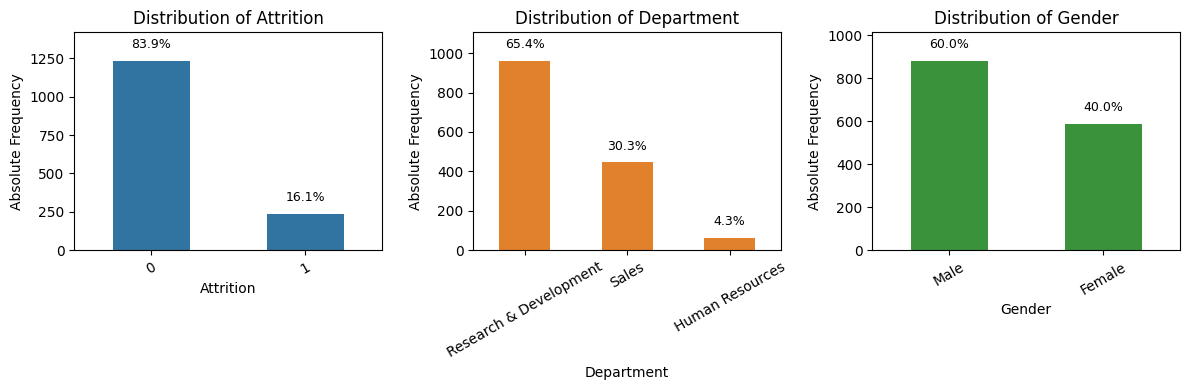

In [ ]:
# list of colors to assign one per graph
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# configure subplot grid: 2 graphs per row
n_cols = 3
n_rows = 1

# create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()  # flatten so we can iterate easily

# loop through each categorical variable and plot
for i, col in enumerate(cat_vars):
    # calculate absolute and relative frequencies
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True) * 100

    # bar plot of absolute frequencies (with one fixed color per graph)
    sns.barplot(x=freq_abs.index, y=freq_abs.values, ax=axes[i],
                color=colors[i % len(colors)], hue=None, width=0.5)

    # formatting of the subplot
    max_val = freq_abs.values.max()
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_ylabel("Absolute Frequency")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=30)
    axes[i].set_ylim(0, max_val * 1.15)

    # add relative frequency (%) above each bar
    for j, val in enumerate(freq_abs.values):
      axes[i].text(j, val + max_val*0.05, f"{freq_rel.values[j]:.1f}%",
                 ha="center", va="bottom", fontsize=9, color="black")

# adjust layout and show all plots
plt.tight_layout()
plt.show()


These bar charts describe the main categorical variables , and they reveal clear asymmetries. Attrition is imbalanced, most employees stay while about 16% leave, so the yes class is a minority for modeling. The company is dominated by Research and Development, around two thirds, Sales is about one third, Human Resources is a small share. Gender is also uneven, roughly 60% male and 40% female.

#### Discrete variables

In [ ]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Calculate stats
summary = []

for col in discrete_vars:
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else None

    # Check skewness and kurtosis of ordinal data
    sk = skew(df[col].dropna(), bias=True)
    ku = kurtosis(df[col].dropna(), bias=True)

    summary.append([col, mode_val, df[col].mean(), df[col].std(),
                    df[col].min(), df[col].median(), df[col].max(), sk, ku])

# Create DataFrame
summary_table = pd.DataFrame(
    summary,
    columns=["Variable", "Mode", "Mean", "StdDev", "Min", "Median", "Max", "Skewness", "Kurtosis"])

# Format numbers
summary_table[["Mean", "StdDev", "Min", "Median", "Max", "Skewness", "Kurtosis"]] = (
    summary_table[["Mean", "StdDev", "Min", "Median", "Max", "Skewness", "Kurtosis"]].round(2))

# Display
summary_table


,Variable,Mode,Mean,StdDev,Min,Median,Max,Skewness,Kurtosis
0,JobLevel,1,2.06,1.11,1,2.0,5,1.02,0.39
1,TrainingTimesLastYear,2,2.80,1.29,0,3.0,6,0.55,0.49
2,StockOptionLevel,0,0.79,0.85,0,1.0,3,0.97,0.36
3,Education,3,2.91,1.02,1,3.0,5,-0.29,-0.56
4,EnvironmentSatisfaction,3,2.72,1.09,1,3.0,4,-0.32,-1.20
5,WorkLifeBalance,3,2.76,0.71,1,3.0,4,-0.55,0.41
6,JobSatisfaction,4,2.73,1.10,1,3.0,4,-0.33,-1.22
7,JobInvolvement,3,2.73,0.71,1,3.0,4,-0.50,0.27
8,RelationshipSatisfaction,3,2.71,1.08,1,3.0,4,-0.30,-1.18


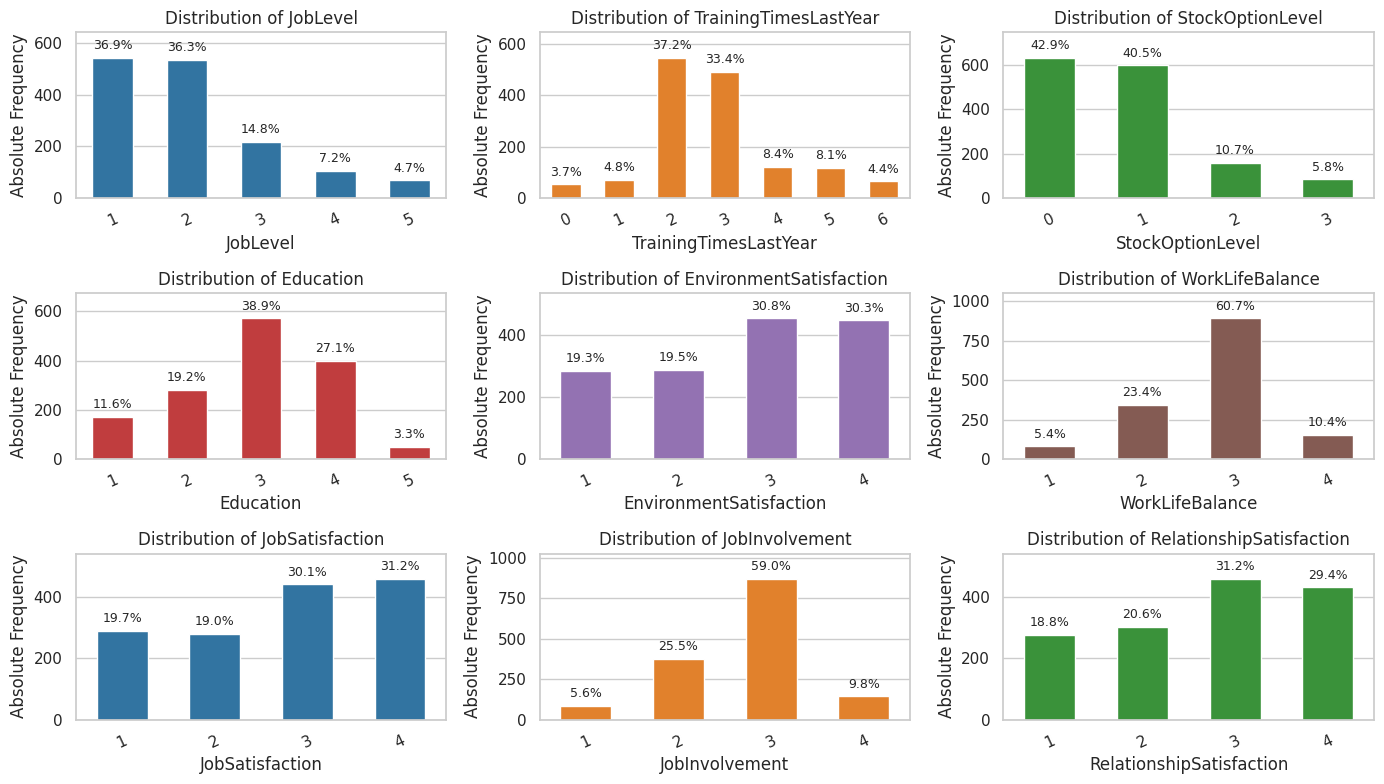

In [ ]:
# One color per graph (6 colors)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Grid: 3 per row x 2 rows
n_cols = 3
n_rows = 3

sns.set(style="whitegrid")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
axes = np.ravel(axes)  # flatten for easy indexing

for i, col in enumerate(discrete_vars):
    ax = axes[i]

    # Frequencies (include missing values if any)
    freq_abs = df[col].value_counts(dropna=False)
    freq_rel = (df[col].value_counts(normalize=True, dropna=False) * 100)

    # Sort by category value if numeric/ordinal, otherwise keep index order
    # (prevents 5,1,3... order when dtype is numeric)
    try:
        # If categories are strings of numbers, cast to numeric for sorting
        idx_sorted = sorted(freq_abs.index, key=lambda x: (np.nan if pd.isna(x) else float(x)))
    except Exception:
        # Fallback: sort by string repr (keeps 'NaN' last)
        idx_sorted = sorted(freq_abs.index, key=lambda x: (str(x) if not pd.isna(x) else 'ZZZ'))

    freq_abs = freq_abs.reindex(idx_sorted)
    freq_rel = freq_rel.reindex(idx_sorted)

    # X labels (cast to str and replace NaN with 'Missing')
    x_labels = [("Missing" if (isinstance(x, float) and np.isnan(x)) else str(x)) for x in freq_abs.index]

    # Bar plot (absolute frequencies)
    sns.barplot(x=x_labels,y=freq_abs.values,ax=ax,color=colors[i % len(colors)],width=0.55)

    # Title and axes
    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Absolute Frequency")
    ax.tick_params(axis="x", rotation=25)

    # Y-limits with headroom for % labels
    max_val = freq_abs.values.max() if len(freq_abs) else 0
    ax.set_ylim(0, max_val * 1.18 if max_val > 0 else 1)

    # Add relative % above each bar
    for j, (abs_v, rel_v) in enumerate(zip(freq_abs.values, freq_rel.values)):
        ax.text(j,abs_v + (max_val * 0.04 if max_val > 0 else 0.05),f"{rel_v:.1f}%",ha="center",va="bottom",fontsize=9)

# Remove any unused subplots (if len(discrete_vars) < n_rows*n_cols)
for k in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

These Histograms can give us a visualization how our ordinal data is distributed. Especially, if variables are too skewed can be of high interest for us for later purposes.

If we take a look at our data we can conclude the variables "Job Level" and "StockOptionLevel" are highly right-skewed, leading to the conclusion that most employees are in low positions and have a lower Stock option level.

Even though other variables show some tendency in a certain direction, these two remain the only ones with a clear tendency.

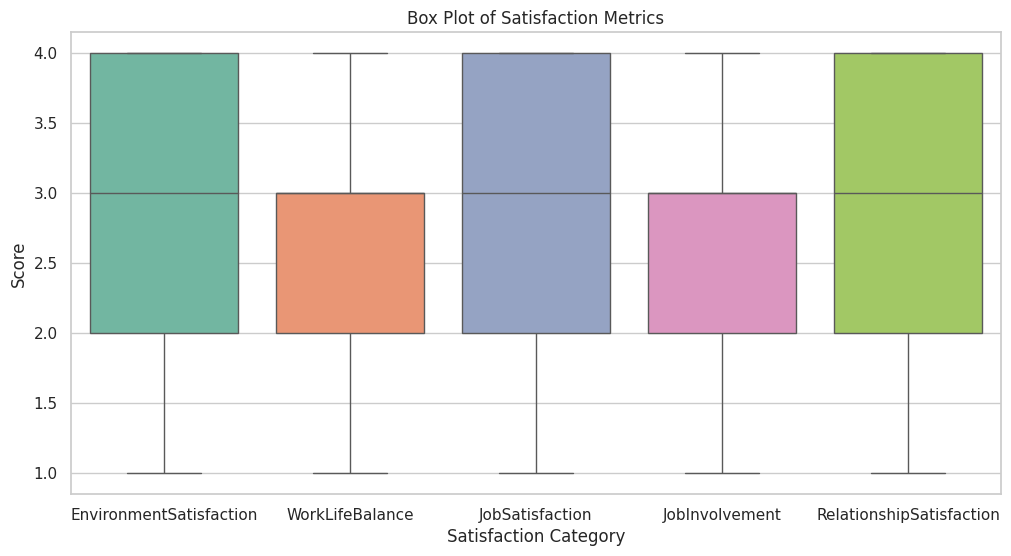

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Melt the dataframe for easy plotting (long format)
df_satisfaction_melted = df[satisfaction_vars].melt(
    var_name='Satisfaction Category',
    value_name='Score')

# Create the single boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Satisfaction Category',
    y='Score',
    data=df_satisfaction_melted,
    palette='Set2')

# Add titles and labels
plt.title('Box Plot of Satisfaction Metrics')
plt.xlabel('Satisfaction Category')
plt.ylabel('Score')

# Display the plot
plt.show()


This box plot compares the distribution of different satisfaction-related variables (EnvironmentSatisfaction, WorkLifeBalance, JobSatisfaction, JobInvolvement, and RelationshipSatisfaction) all measured on a 1–4 scale. The median score across most categories centers around 3, indicating generally moderate to high satisfaction levels. The boxes span from 2 to 4, showing limited variability and a relatively balanced perception among employees across satisfaction dimensions, with no significant outliers present.

#### Continuous Variables

**Box Plots**

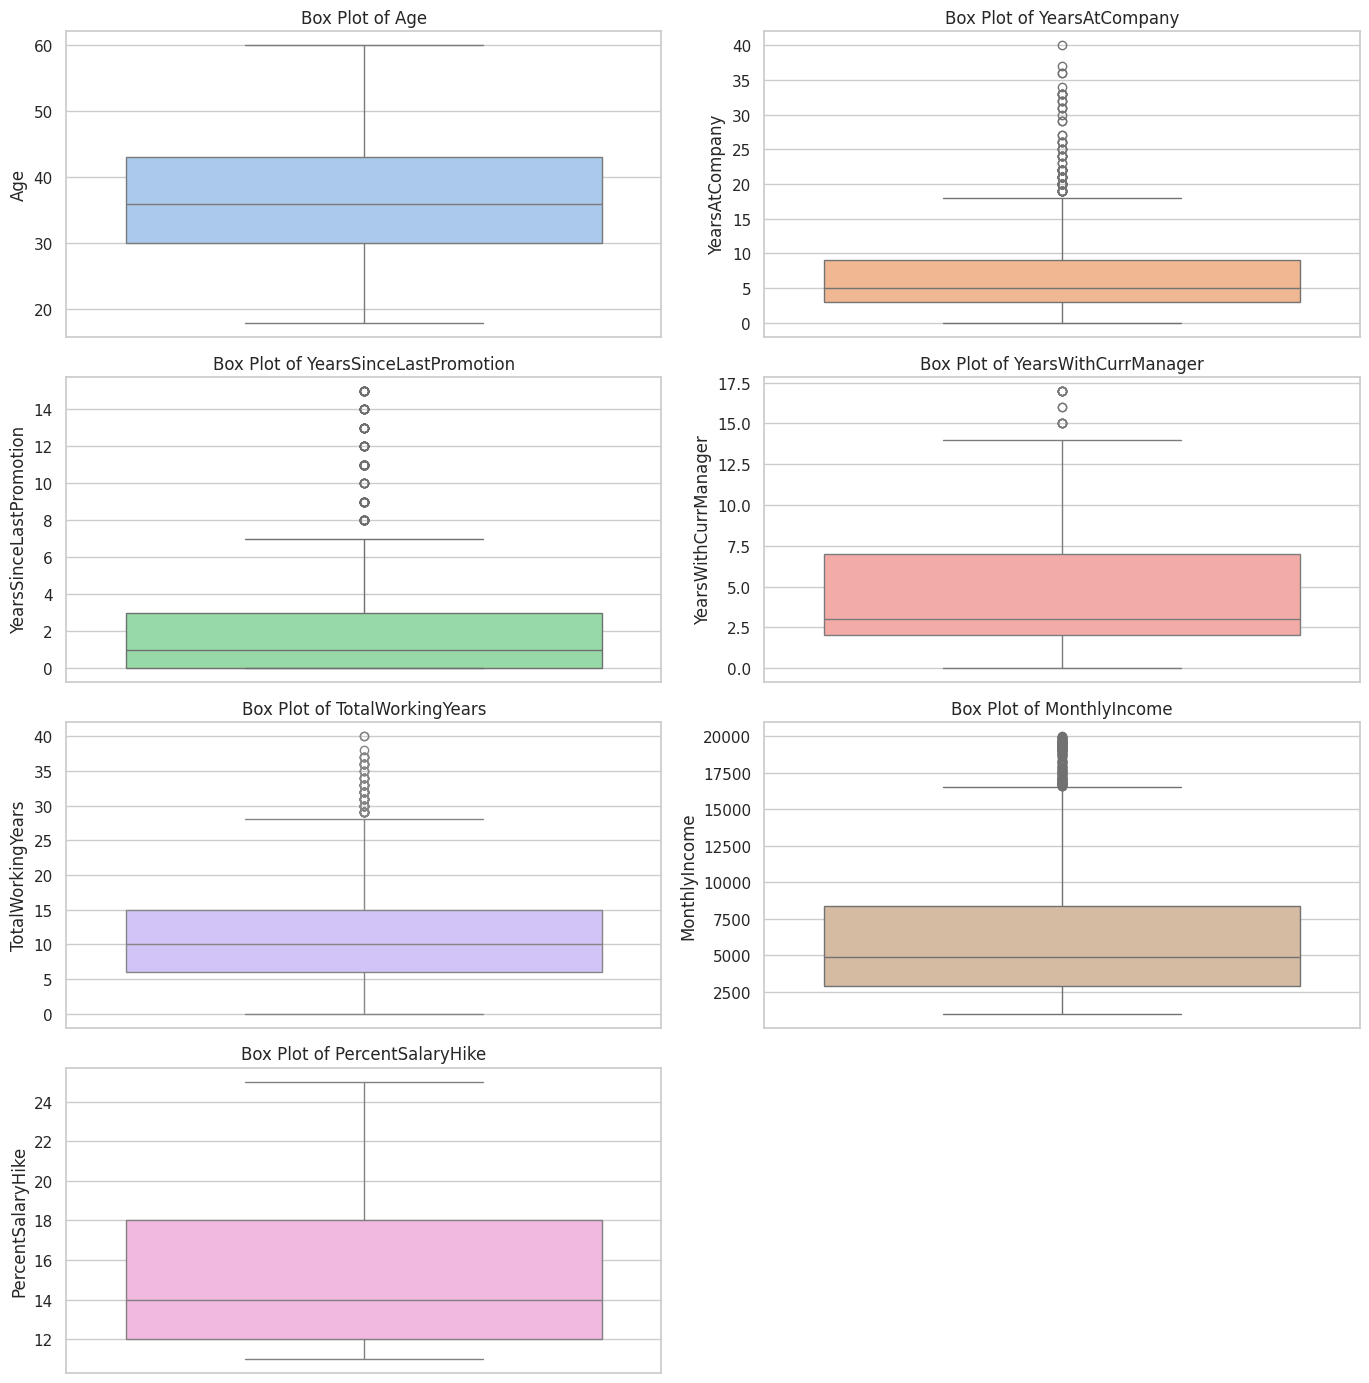

In [ ]:
# grid configurations
sns.set(style="whitegrid")

n = len(continuous_vars)
rows, cols = 4, 2

fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
axes = axes.flatten()

colors = sns.color_palette("pastel", n_colors=n)

# plot each continuous variable
for i, var in enumerate(continuous_vars):
    sns.boxplot(y=df[var], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Box Plot of {var}', fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(var)

# remove empty subplot if any
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


These box plots show that most employees are relatively young, with moderate tenure at the company and few years since their last promotion or under the same manager, while a smaller group stands out with higher experience, income, and time in role. The variability across these variables suggests different career stages within the workforce.

Next, the distribution plots and the computation of skewness and kurtosis will help us better understand the shape and symmetry of these variables.

**Histograms and Kernel Density Plots**

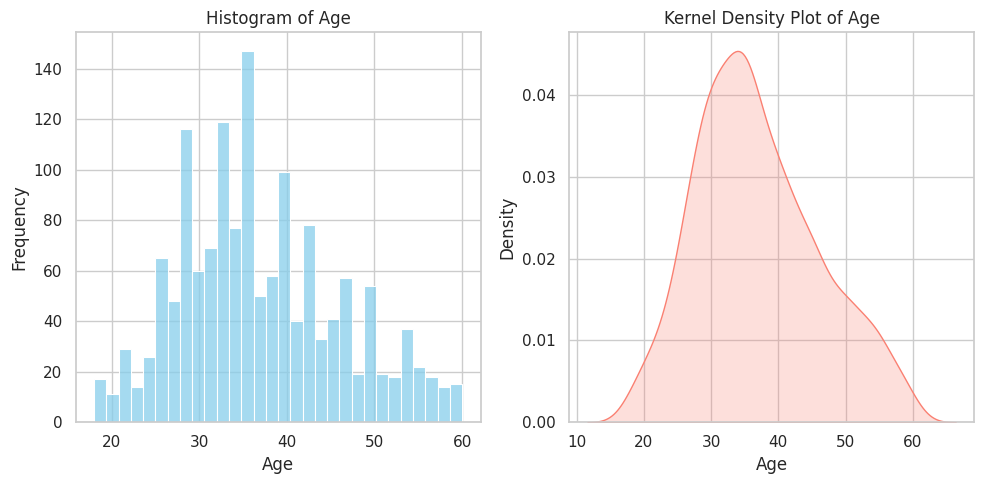

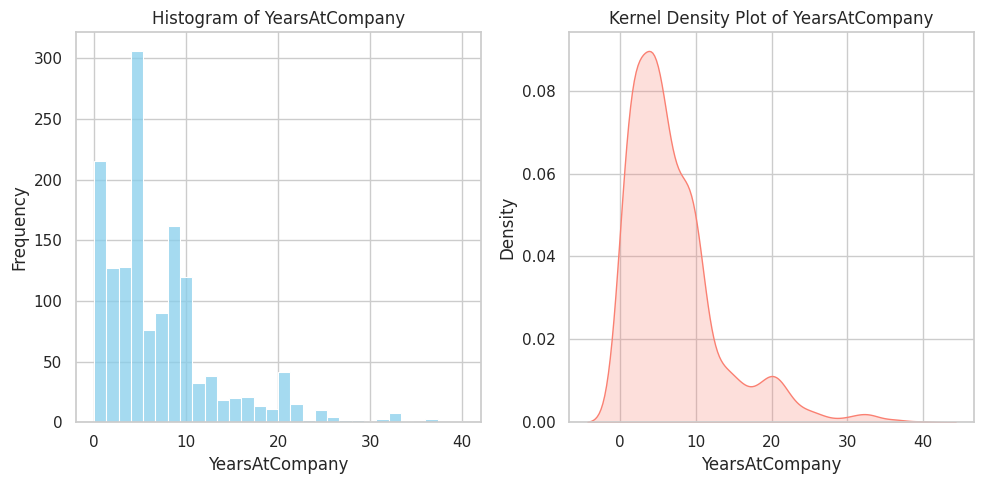

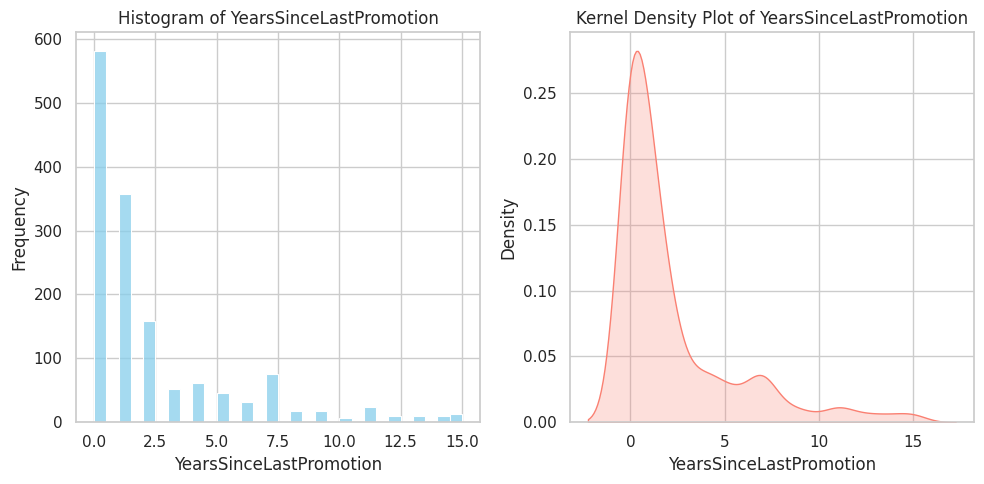

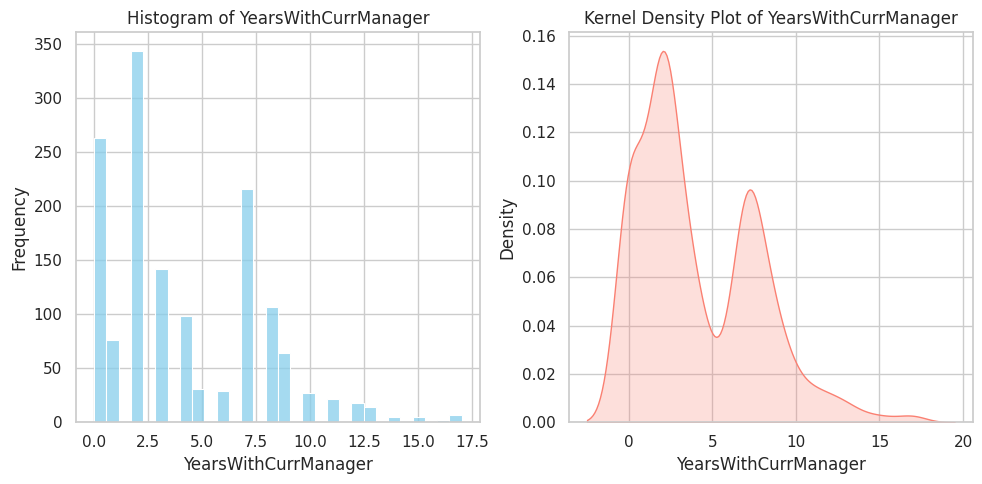

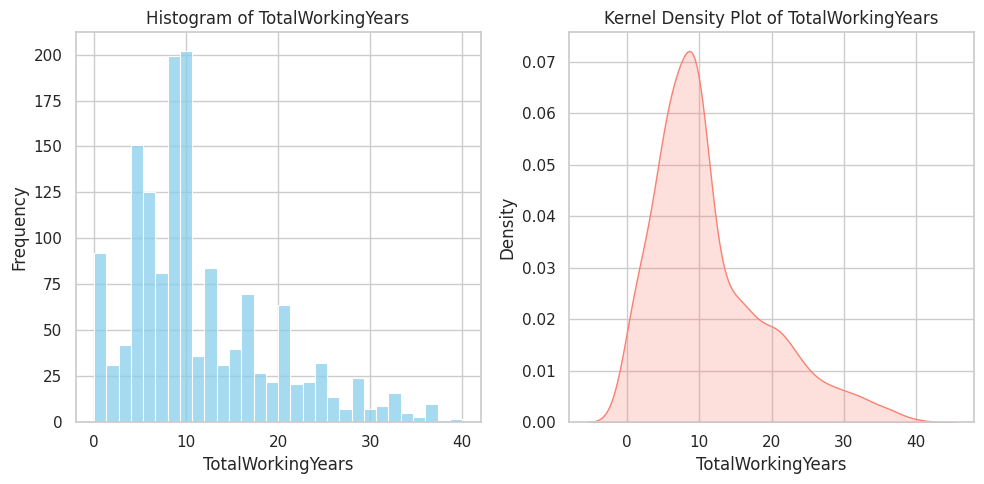

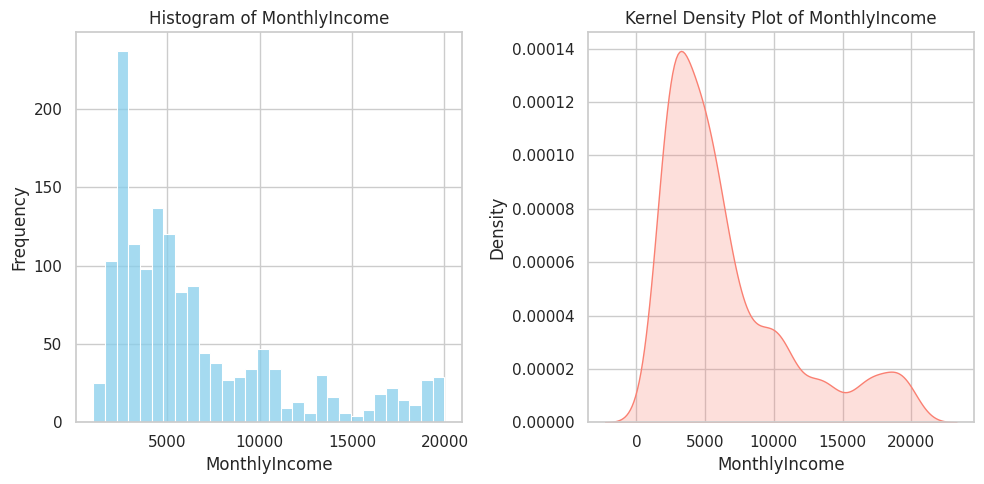

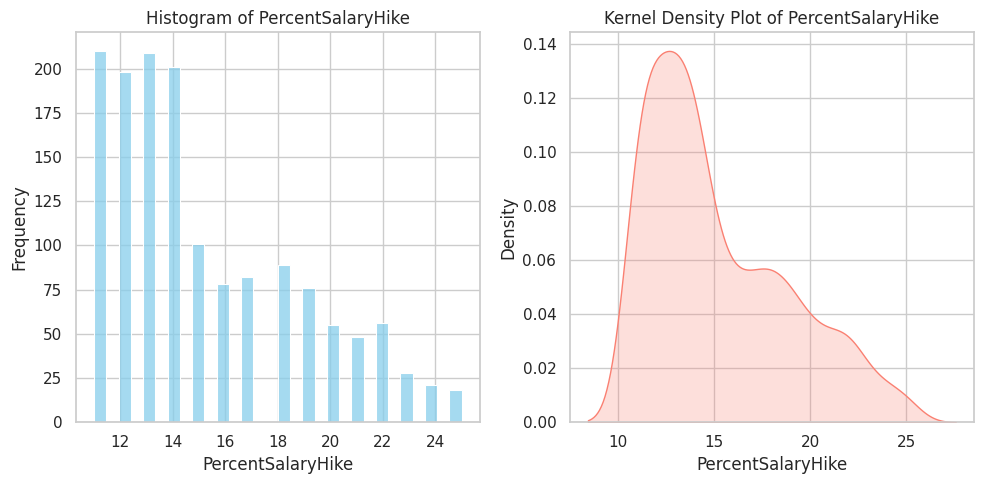

In [ ]:
# Create plots for each variable
for var in continuous_vars:
    # Set the figure size for the plots
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=var, bins=30, kde=False, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Kernel Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=var, fill=True, color='salmon')
    plt.title(f'Kernel Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(True)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

The age distribution concentrates between 30 and 40 years, and the shape is mildly left skewed, suggesting a relatively young workforce.
For YearsAtCompany, most employees have under ten years of tenure, which points to a staff base with mostly short to medium service and fewer long stayers.
MonthlyIncome shows a clear right skew, many workers earn in the lower range, while a smaller group earns much higher salaries.

To deepen the analysis of distributional shape, the next section computes skewness and kurtosis for the key variables.

*Skewness and Kurtosis*

In [ ]:
from scipy.stats import skew, kurtosis

# Calculate skewness, kurtosis, mean and std for each variable
results = []
for var in continuous_vars:
    sk = skew(df[var], axis=0, bias=True)
    ku = kurtosis(df[var], axis=0, bias=True)
    mean_val = df[var].mean()
    std_val = df[var].std()
    results.append([var, round(sk, 5), round(ku, 4), round(mean_val, 4), round(std_val, 4)])

# Create a DataFrame styled like df.info() output
skew_kurt_table = pd.DataFrame(results, columns=["Variable", "Skewness", "Kurtosis", "Mean", "StdDev"])
skew_kurt_table.set_index("Variable", inplace=True)

# Display
skew_kurt_table


,Skewness,Kurtosis,Mean,StdDev
Variable,,,,
Age,0.41286,-0.4069,36.9238,9.1354
YearsAtCompany,1.76273,3.9181,7.0082,6.1265
YearsSinceLastPromotion,1.98226,3.5963,2.1878,3.2224
YearsWithCurrManager,0.83260,0.1664,4.1231,3.5681
TotalWorkingYears,1.11603,0.9111,11.2796,7.7808
MonthlyIncome,1.36842,0.9977,6502.9313,4707.9568
PercentSalaryHike,0.82029,-0.3037,15.2095,3.6599


In a normal distribution, skewness is 0 and kurtosis is 3.
Age is mildly right skewed and flatter than normal, which suggests a fairly balanced spread with few extreme ages.
MonthlyIncome is clearly right skewed with lighter tails than normal, so incomes vary widely but extreme salaries are relatively rare.
YearsAtCompany is strongly right skewed with heavier tails than normal, most employees have short tenures, yet a few show very long careers.
To stabilize these shapes we can **apply transformations** on the variables, for example **log-transformation**.

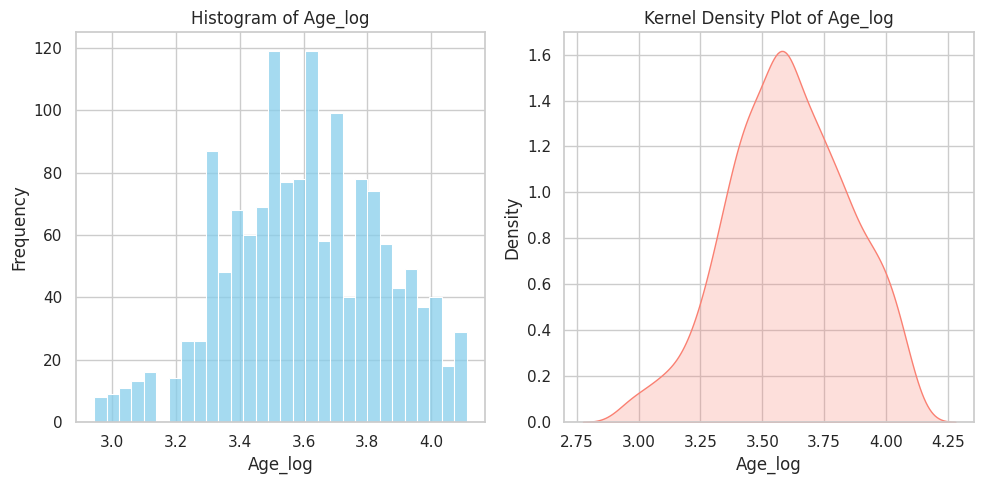

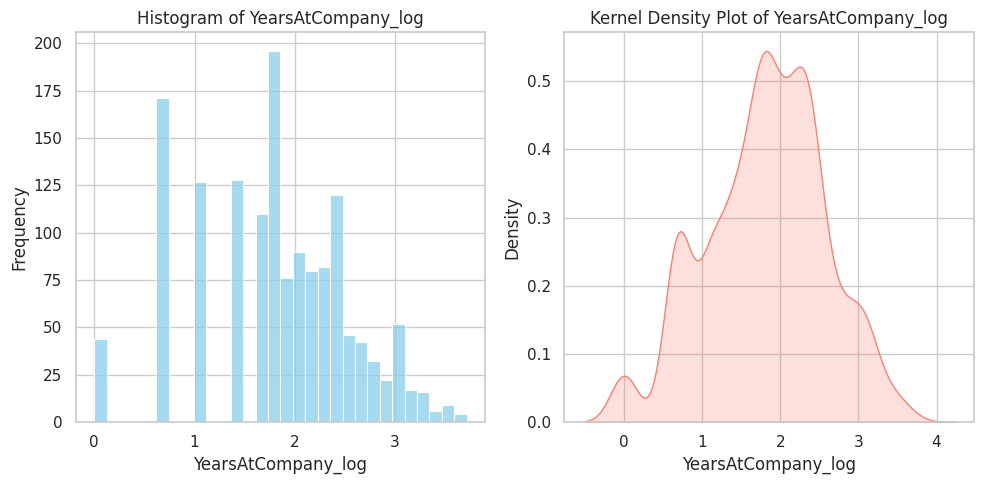

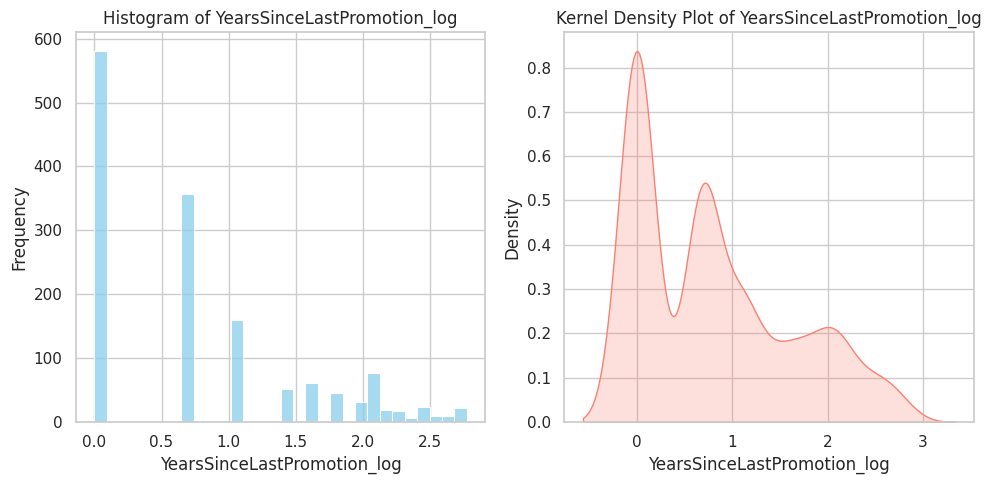

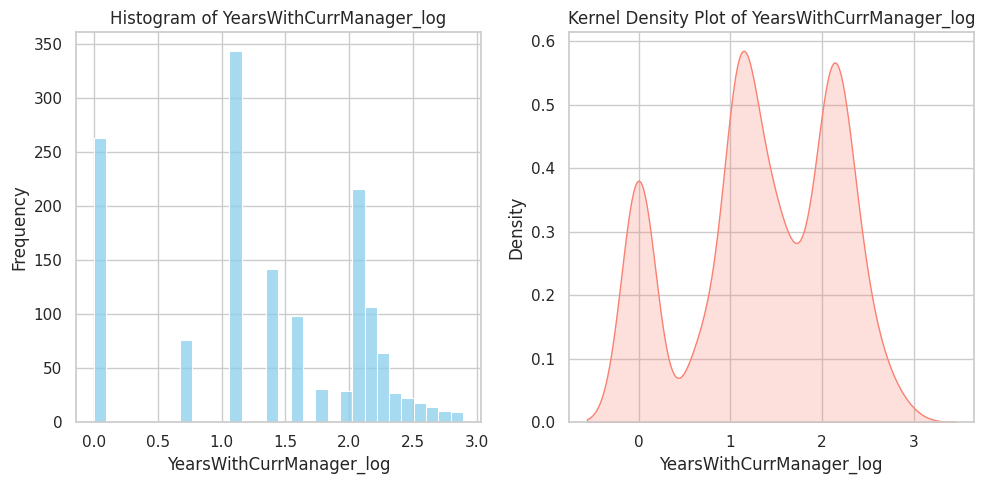

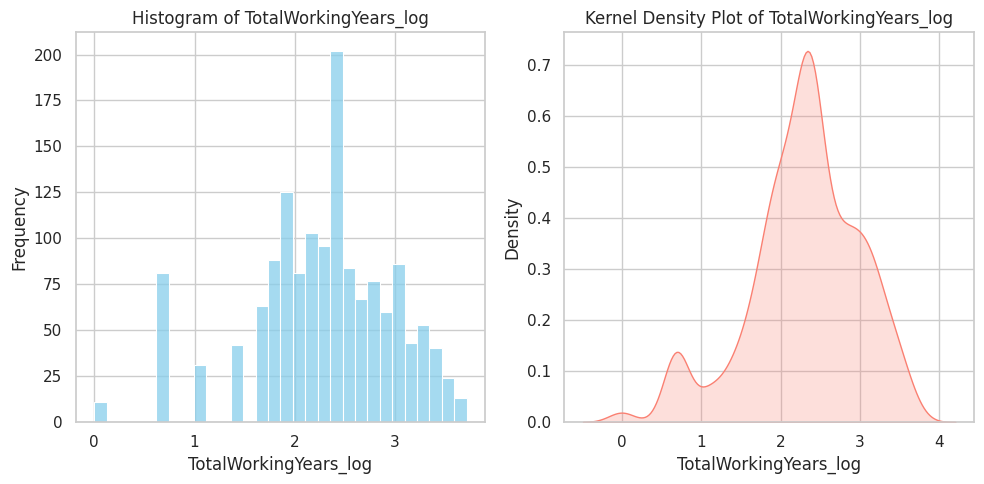

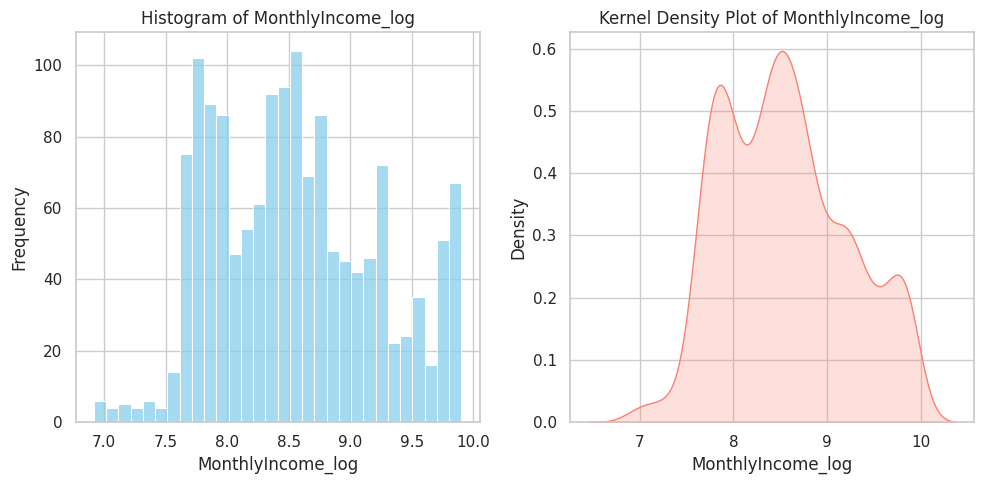

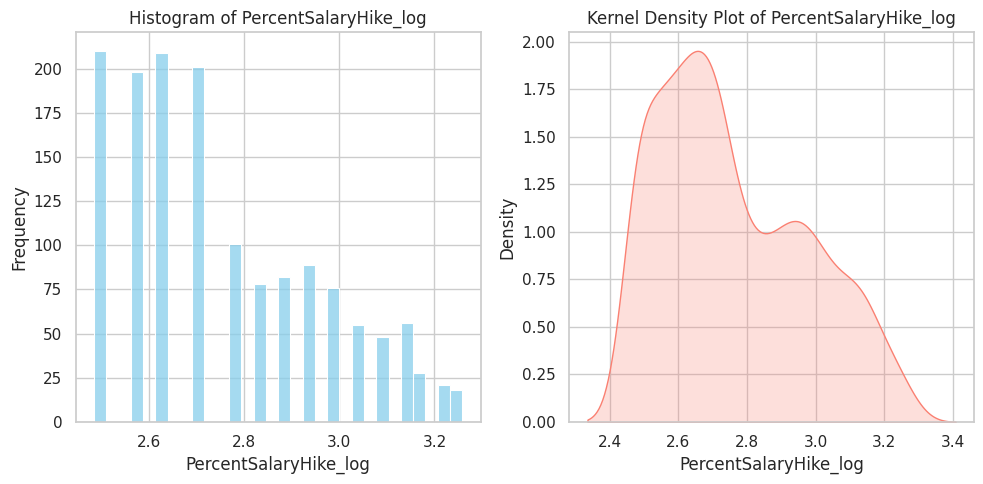

In [ ]:
# Apply log1p transformation (log(1+x)) to avoid issues with zeros
log_vars = [var + "_log" for var in continuous_vars]
for var, log_var in zip(continuous_vars, log_vars):
    df[log_var] = np.log1p(df[var])

# Create plots for each log-transformed variable
for var in log_vars:
    # Set the figure size for the plots
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=var, bins=30, kde=False, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Kernel Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=var, fill=True, color='salmon')
    plt.title(f'Kernel Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(True)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

In [ ]:
# Calculate skewness, kurtosis, mean and std for log-transformed variables
results_log = []
for var in log_vars:
    sk = skew(df[var], axis=0, bias=True)
    ku = kurtosis(df[var], axis=0, bias=True)
    mean_val = df[var].mean()
    std_val = df[var].std()
    results_log.append([var, round(sk, 5), round(ku, 4), round(mean_val, 4), round(std_val, 4)])

# Create a DataFrame styled like df.info() output
skew_kurt_table_log = pd.DataFrame(
    results_log,
    columns=["Variable", "Skewness", "Kurtosis", "Mean", "StdDev"]
)
skew_kurt_table_log.set_index("Variable", inplace=True)

# Display
skew_kurt_table_log


,Skewness,Kurtosis,Mean,StdDev
Variable,,,,
Age_log,-0.13609,-0.3541,3.6064,0.2431
YearsAtCompany_log,-0.20750,-0.2862,1.8117,0.7569
YearsSinceLastPromotion_log,0.71807,-0.6018,0.7881,0.8100
YearsWithCurrManager_log,-0.35732,-0.9094,1.3501,0.8063
TotalWorkingYears_log,-0.62154,0.5092,2.2942,0.6986
MonthlyIncome_log,0.28616,-0.6993,8.5528,0.6643
PercentSalaryHike_log,0.51302,-0.8097,2.7619,0.2143


We applied logarithmic transformations to variables with right skewness, such as income and tenure, to compress extreme high values and stabilize variance. After transformation, skewness moves closer to zero, indicating that the distributions become more symmetric and closer to normality, even though kurtosis values do not consistently approach three. This still reflects a substantial improvement in distributional balance, as the transformation mitigates the effect of outliers and reduces the influence of long right tails. The ordering of observations remains unchanged, ensuring that relative differences are preserved. Overall, the transformed features are less skewed, supporting clearer visualization, improved comparability across variables, and more reliable inference in subsequent modeling.

### 3.3.3. Bivariate analysis

**Stratified Box Plots**

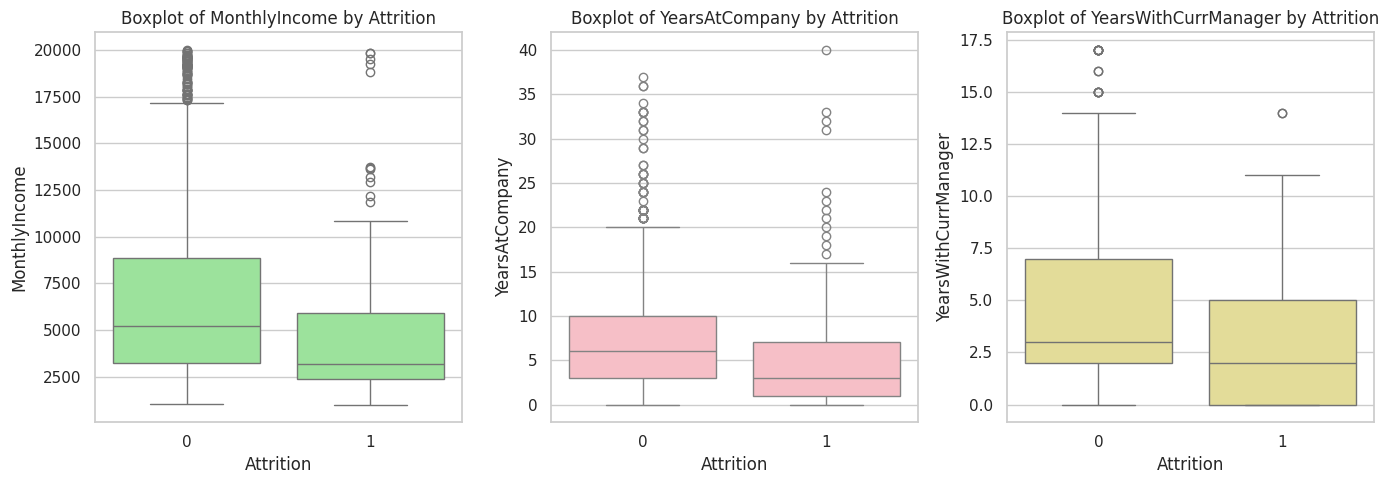

In [ ]:
# continuous variables to analyze
cont_vars = ["MonthlyIncome", "YearsAtCompany", "YearsWithCurrManager"]

# style configuration
sns.set(style="whitegrid")
colors = ["lightgreen", "lightpink", "khaki"]

# grid configuration (only one row now)
fig, axes = plt.subplots(1, len(cont_vars), figsize=(14, 5))

for i, var in enumerate(cont_vars):
    # Boxplot
    sns.boxplot(x="Attrition", y=var, data=df, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Boxplot of {var} by Attrition")
    axes[i].set_xlabel("Attrition")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


These boxplots compare the distributions of MonthlyIncome, YearsAtCompany, and YearsWithCurrManager across Attrition groups. Boxplots summarize medians, interquartile ranges, and outliers, allowing clear comparison of central tendency and spread between employees who stayed and those who left.


**MonthlyIncome** is higher on average for employees who did not leave, with a higher median and a wider upper tail, suggesting that lower pay is associated with attrition, although there is substantial overlap between groups.

**YearsAtCompany** is typically longer for the “no” group, with many short tenures among leavers, consistent with early exits.

**YearsWithCurrManager** is also higher for the “no” group, pointing to a link between longer manager relationships and retention.

These patterns help flag potential drivers of attrition.They do not prove causality, so we will test these signals in multivariate models to quantify effect sizes.

### 3.3.4 Multivariate analysis

**Correlation plot**

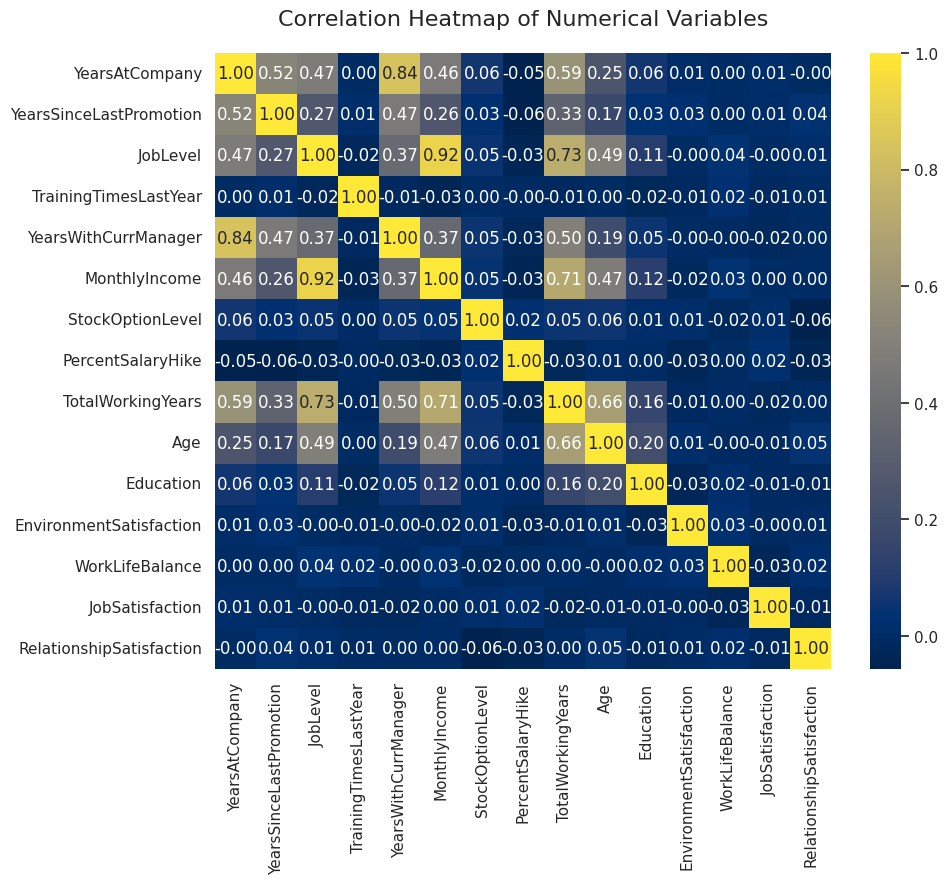

In [ ]:
# create a dataframe only with the numerical variables
num_df = df[num_vars]

# calculate the correlation matrix
corr = num_df.corr(method = 'spearman') #Using Spearman´s coefficient since we are not only taking metric data into account

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="cividis", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16, pad=20)
plt.show()

This correlation heatmap shows how numeric variables move together, and it helps spot redundant signals and potential multicollinearity.
MonthlyIncome is very strongly correlated with JobLevel, and also with TotalWorkingYears and YearsAtCompany, which suggests overlapping information between seniority, tenure, and pay.
YearsAtCompany correlates with YearsWithCurrManager and YearsSinceLastPromotion, indicating that longer service tends to come with longer manager relationships and longer gaps between promotions.
JobLevel also rises with TotalWorkingYears and Age, consistent with a tenure driven hierarchy.
PercentSalaryHike, TrainingTimesLastYear, StockOptionLevel, Education, and EnvironmentSatisfaction show weak correlations with most variables, so they may add orthogonal signal.
For modeling we will watch for multicollinearity among the highly correlated blocks (for example pay, level, tenure), consider feature selection or regularization, and remember that correlation does not imply causation.

# **4. Method 1 - Logistic Regression**

Employee compensation is one of the most influential factors affecting workforce motivation and retention. Understanding how financial rewards relate to the likelihood of employees leaving an organization provides valuable insights for HR policy and strategic planning. In this section, we aim to analyze the extent to which compensation-related factors influence employee attrition.

Specifically, this model examines three key **compensation variables** (**Monthly Income, Stock Option Level, and Percent Salary Hike**) to determine whether they significantly affect the probability of an employee leaving the company. Because the dependent variable, *Attrition*, is binary (“Yes” if the employee has left and “No” if they remain employed), **logistic regression** is the most suitable analytical approach. This method allows us to estimate the likelihood of attrition based on compensation levels and to assess the direction and strength of each variable’s influence.

The following hypotheses were formulated to guide this analysis:

**H0₁:** Monthly income, stock option level, and percent salary hike have no significant effect on the likelihood of employee attrition.

**H1₁:** Monthly income, stock option level, and percent salary hike have a significant effect on the likelihood of employee attrition.

## **4.1 Creating the model**

In [ ]:
# Create logistic regression model
logit_model = smf.logit('Attrition ~ MonthlyIncome + StockOptionLevel + PercentSalaryHike', data=df).fit()

# Print the summary of the model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.416077
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1466
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Oct 2025   Pseudo R-squ.:                 0.05800
Time:                        16:14:34   Log-Likelihood:                -611.63
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.099e-16
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3994      0.338     -1.181      0.238      -1.062       0.264
MonthlyI

The logistic regression results presented in the table above estimate how employee compensation levels influence the likelihood of attrition.

Among the three compensation variables analyzed, **Monthly Income** and **Stock Option Level** exhibit statistically significant effects on attrition, as their p-values are below 0.05 (the conventional significance threshold). Conversely, **Percent Salary Hike** has a p-value greater than 0.05, indicating that it does not significantly influence employee attrition within this model.

Specifically, although the coefficient for **MonthlyIncome** is negative, its magnitude is extremely small and rounds to zero. This indicates that, while the model detects a statistically significant relationship (p = 0.000), the practical effect size is negligible. In other words, changes in monthly income have minimal real-world impact on the probability of attrition once other factors are controlled for. Thus, while income differences exist between leavers and stayers, income alone is not a strong explanatory driver of attrition in this model.

Alternatively, **Stock Option Level** has a negative coefficient of -0.5032 (p = 0.000), indicating that employees with higher stock option levels are less likely to leave the company. This finding supports the idea that equity-based compensation serves as an effective retention mechanism, aligning employees’ long-term interests with those of the organization.

On the other hand, **Percent Salary Hike** presents a negative coefficient of -0.0129, but with a p-value of 0.522, which exceeds the 0.05 significance level. Therefore, we fail to reject the null hypothesis for this variable, implying that annual salary increases, by themselves, do not have a statistically significant impact on whether employees stay or leave.

**Therefore, the Multiple Logistic Regression table indicates that two out of the three independent variables significantly affect the probability of employee attrition.**

## **4.2 Interpreting the outcome**

### 4.2.1 Goodness-of-fit

#### R-Squared metrics

In [ ]:
n = len(df)  # number of observations

# McFadden's pseudo R-squared
mcfadden_r2 = 1 - (logit_model.llf / logit_model.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2}")

#Cox & Snell R-Squared
cox_snell_r2 = 1 - np.exp((logit_model.llnull - logit_model.llf) * 2 / n)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2}")

# Nagelkerke R-Squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(-logit_model.llnull * 2 / n))
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2}")

McFadden's pseudo R-squared: 0.057999191879190004
Cox & Snell pseudo R-squared: 0.04994545711932796
Nagelkerke pseudo R-squared: -0.03519552256296672




Firstly, the *McFadden’s R²* assesses how much better the full model predicts the outcome relative to the null-model. In this case, the value of 0.058 means that this model predicts 5.8% more than the null model, which is rather low.

*Cox & Snell’s R²* measures the proportional improvement in model fit over the null model, though it is limited by values less than 1. Here, the value of 0.049 means that the model accounts for about 4.9% of the variation in the likelihood of employee attrition, again suggesting a low overall explanatory capacity.

Lastly, *Nagelkerke’s R²* adjusts Cox & Snell’s measure to scale it between 0 and 1. Having a negative value (-0.035) indicates potential issues with the model.

Overall, the model presents rather low R-squared values, which means that its predictive capacity will be limited. Still, it will be used for hypothesis testing.

#### Confusion Matrix

In [ ]:
# 1) MAKE PREDICTIONS FOR NULL MODEL AND LOGIT MODEL

# Predict using the null model (most frequent class)
most_frequent_class = df['Attrition'].mode()[0]

# Generate predictions for the null model
null_model_predictions = np.full_like(df['Attrition'], most_frequent_class)

# Predict probabilities using the logistic regression model
logit_predictions_prob = logit_model.predict()

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
logit_predictions_class = (logit_predictions_prob >= 0.5).astype(int)


# 2) PRINT THE CONFUSION MATRIX

# Then,  print the matrix
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for the null model
null_conf_matrix = confusion_matrix(df['Attrition'], null_model_predictions)

# Confusion matrix for the logistic regression model
logit_conf_matrix = confusion_matrix(df['Attrition'], logit_predictions_class)

# Print the confusion matrices
print("Confusion Matrix for the Null Model:")
print(null_conf_matrix)

print("\nConfusion Matrix for the Logistic Regression Model:")
print(logit_conf_matrix)


Confusion Matrix for the Null Model:
[[1233    0]
 [ 237    0]]

Confusion Matrix for the Logistic Regression Model:
[[1233    0]
 [ 237    0]]




The confusion matrices confirm the conclusions drawn from the pseudo R-squared metrics, indicating that the model’s predictive ability is very limited.

The **null model**, which contains no predictors, simply classifies all employees according to the most frequent outcome in the dataset. Since the majority of observations correspond to employees who did not leave the company (Attrition = 0), the null model predicts “no attrition” for every case. As a result, the model correctly identifies the 1,233 employees who stayed (true negatives) but fails to detect any of the 237 employees who actually left (false negatives).

The **logistic regression model** yields exactly the same confusion matrix as the null model. This means that, even after including compensation variables (Monthly Income, Stock Option Level, and Percent Salary Hike), the model still predicts “no attrition” for all employees. Consequently, it achieves the same number of correct predictions (1,233) but fails to identify any actual cases of attrition.

These results highlight the strong class imbalance in the dataset: the proportion of “no attrition” cases heavily outweighs the “attrition” cases. Because of this imbalance, the logistic regression model is biased toward predicting the dominant class, leading to poor performance in identifying employees likely to leave.

Despite the model’s limited predictive power, it can still be used effectively for hypothesis testing, as logistic regression provides valuable information about the statistical significance and direction of relationships between compensation-related factors and the likelihood of employee attrition.

### 4.2.2 Hypothesis testing - Odds ratio

In [ ]:
# Get the odds ratios (exponentiated coefficients)
odds_ratios = pd.DataFrame({
    'Variable': logit_model.params.index,
    'Odds Ratio': np.exp(logit_model.params.values)
})
print(odds_ratios)

            Variable  Odds Ratio
0          Intercept    0.670724
1      MonthlyIncome    0.999874
2   StockOptionLevel    0.604602
3  PercentSalaryHike    0.987157




All independent variables have odds ratios below 1, indicating that a one-unit increase in each predictor decreases the odds of employee attrition. In other words, as compensation-related factors improve, the likelihood of an employee leaving the company declines.

Specifically, the odds ratio of 0.9999 for **Monthly Income** implies that for every additional unit increase in income, the odds of attrition decrease by approximately 0.01%. While this effect is extremely small, it aligns with the expectation that higher salaries contribute marginally to employee retention.

Similarly, the odds ratio of 0.60 for **Stock Option Level** suggests a stronger effect: for each additional stock option level granted to an employee, the odds of attrition decrease by roughly 39.5% (1 − 0.6046). This finding supports the idea that long-term incentive plans, such as stock options, are effective tools for reducing turnover by strengthening employees’ commitment to the organization.

Finally, the odds ratio of 0.99 for **Percent Salary Hike** indicates that each 1% increase in annual salary corresponds to about a 1.3% decrease in the odds of attrition (1 − 0.987). However, given the small magnitude of this effect and its lack of statistical significance in the logistic regression table, this reduction may not represent a meaningful or reliable impact.

Overall, the results suggest that compensation elements associated with long-term value (such as stock options) have a more substantial influence on employee retention than short-term or incremental pay increases. While the overall model shows limited predictive power, the direction of the effects remains consistent with economic and behavioral theories linking higher and more stable compensation to lower turnover intentions.

## **4.3 Model 1 - final conclusions**

Although the logistic regression model demonstrates **limited predictive capability**, as reflected by low pseudo R-squared values and identical confusion matrices to the null model, it **still holds statistical and analytical value**. Since we could not show statistical significance for the variable "PercentSalaryHike" **we cannot reject our null hypothesis**. Still, the model provides insight into how compensation-related factors influence the likelihood of employee attrition, allowing for meaningful hypothesis testing and interpretation of variable significance.

The results show that while Monthly Income and Stock Option Level have statistically significant and negative relationships with attrition, indicating specially that a good stock level reduces the odds of employees leaving, the model as a whole explains only a small portion of the variation in turnover behavior. **This suggests that compensation alone is not sufficient to predict attrition**, and that other dimensions such as job satisfaction, work environment, and career development likely play a stronger role in employee retention.

Given these findings, and recognizing that **attrition is a multifactorial phenomenon**, the next stage of this analysis will involve conducting a **factor analysis** using additional variables related to job satisfaction, work environment, and career progression. This approach will allow us to capture broader aspects of employee experience, providing a more comprehensive understanding of the underlying factors driving attrition within the organization.


# **5. Method 2 - Factor analysis**

After taking a closer look into the variables belonging to the compensation field, we are interested in reducing the number of relevant variables to reveal latent patterns. For this purpose, we decided to conduct a **Factor Analysis**, investigating variables we consider to theoretically belong to the fields of Career & Development, Compensation and Satisfaction. Next to the variables we indentified for these field in 2.1 we will also consider the "Age" Variable, since we it can directly relate to the work experience and therefore to the relevant variables describing the development of a worker in the company.  
  
The following hypotheses were guided to conduct this analysis:

**H0**: The fields of Career & Development, Compensation and Satisfaction have no significant effect on the likelihood of employee attrition
**H1**: The fields of Career & Development, Compensation and Satisfaction have significant effect on the likelihood of employee attrition

**Install the library Factor anyalyzer**

In [ ]:
%pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=f35a808bee2e553bd2864cf327b06cd19c0b737afb819c5e1a22158bc1e5ea58
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


## **5.1 Define relevant variables**

In [ ]:
from factor_analyzer import FactorAnalyzer, calculate_kmo

# Select our identified columns
identified_vars = ["EnvironmentSatisfaction", "WorkLifeBalance", "JobSatisfaction",
                   "RelationshipSatisfaction", "JobInvolvement", "YearsAtCompany",
                   "TrainingTimesLastYear", "YearsSinceLastPromotion", "JobLevel",
                   "Department", "YearsWithCurrManager", "MonthlyIncome","StockOptionLevel",
                   "Age", "TotalWorkingYears","PercentSalaryHike", "Attrition"]

# Nominal data like the variable "Department" cannot be further considered for our factor analysis

selected_ordinal_vars = ['EnvironmentSatisfaction', 'WorkLifeBalance', 'JobSatisfaction',
                         'RelationshipSatisfaction', 'JobInvolvement', 'TrainingTimesLastYear'] # "JobLevel" & "StockOptionLevel" are highly skewed and therefore can´t be used (see Histograms in 3.3.2 --> "Discrete Variables")

selected_continuous_vars = ["YearsAtCompany", "YearsSinceLastPromotion",
                           "YearsWithCurrManager", "MonthlyIncome",
                            "TotalWorkingYears","Age","PercentSalaryHike"]

## **5.2 Exploratory factor analysis**

For our exploratory factor analsis we performed several versions. We first took a look at our dataset without transforming the variables to a normal distribution to recognize if our variables will reveal patterns with their original values. After we identified that we cannot obtain a proper factor analysis, we tried to transform our data.

First, we used a logistic transformation to reduce the effect of outliers on our continuous variables and afterwards a standardization on both, continuous and ordinal data.
Since we still couldn´t conduct a proper analysis afterwards, we decided to alter our chosen set of variables and therefore our hypothesis, which made it possible to perform a factor analysis identifiying two dimensions.


###  **5.2.1 Dataset with non-transformed data**

In [ ]:
# Define relevant columns for raw data version
data_summary_raw = df[selected_continuous_vars + selected_ordinal_vars]

#### 1) Assess correlation matrix and check requirements

Since we are taking a look into the raw data without transformation we are referring for our statistic summary table to 3.3.1 and for our correlation matrix heatmap to 3.3.4

**Kaiser-Meyer-Olkin (KMO)**

In [ ]:
# Perform Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy
kmo_all, kmo_model = calculate_kmo(data_summary_raw)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8)")

KMO Model Score: 0.753 (must be > 0.5; should be > 0.8)


The Kaiser-Meyer-Olkin criterion assesses if the variables provide sufficient correlation to perform an acceptable factor analysis. Our KMO Score of 0.753 indicates that the correlations among our chosen variables are adequate, even though they are not ideal. While the value falls below the "threshold" for a good analysis (0.8), it still reaches the minimum acceptance level of conducting a factor analysis (0.5).

#### 2) Extract factors from Variables

**Kaiser Criterion (Eigenvalues)**

In [ ]:
# Perform the Factor Analysis without specifying the number of factors to generate eigenvalues
fa = FactorAnalyzer(n_factors=data_summary_raw.shape[1], rotation=None)
fa.fit(data_summary_raw)

# Get eigenvalues
eigenvalues_raw, _ = fa.get_eigenvalues()

eigenvalues_raw

array([3.47386882, 1.19132291, 1.08425871, 1.03951611, 1.01974987,
       0.99226308, 0.97285221, 0.95134436, 0.93697671, 0.51672554,
       0.47147686, 0.19921784, 0.15042698])

According to the Kaiser criterion, we choose all the factors with eigenvalues > 1. In this case, the first five factors fulfill this criterion.

An eigenvalue > 1 means that a factor explain more than its own variance.

**Elbow criterion**

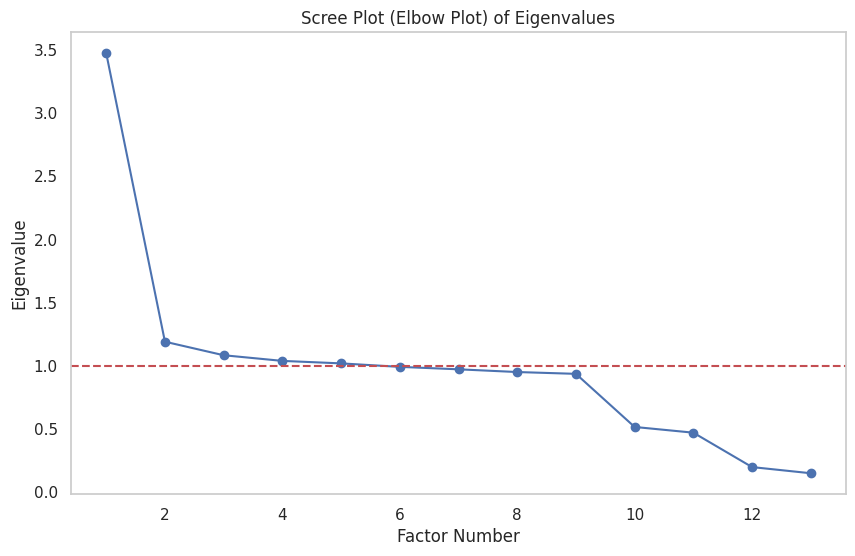

In [ ]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, data_summary_raw.shape[1] + 1), eigenvalues_raw, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

Based on the screeplot, we can see that there is a sharp drop after the first factor, indicating that this factor explains most of correlation corresponding to our relatively good KMO score. Even though five factors exceed the threshold, factor three to five merely pass it.

**Percentage of variance criterion**

In [ ]:
# Compute how much variance different factor solutions explain.

# Perform EFA with n_factors=number of variables
# Factor solution
fa_solution1_raw = FactorAnalyzer(n_factors=9, rotation=None).fit(data_summary_raw)
variance_explained_fa_solution1_raw = fa_solution1_raw.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1_raw[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1_raw[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [0.25119918 0.07311477 0.02202714 0.01548772 0.01353813 0.0111632
 0.00766722 0.00587321 0.00387645]
Cumulative variance explained:
 [0.25119918 0.32431395 0.34634109 0.36182881 0.37536693 0.38653013
 0.39419735 0.40007056 0.403947  ]


Based on the percentage of variance explained, we should choose a factor solution respective to the number of variables explaining at least 60% of the total variance. However, as the cumulative value of all our variables only explain 40% of the variation, the criterion suggests that the current maximum factor number capture only a limited portion of the total variance, indicating that the data may require more or stronger factors for appropriate representation.

#### 3) Optimize factors and assess factor loadings

Since the percentage of value criterion indicates that the chosen variables explaint to few of the variation, we will choose the number of factors based on the eigenvalue/elbow plot.
Although five factors have eigenvalues greater than one, factors four and five only marginally exceed the threshold and contribute minimal additional variance.
The scree plot shows a clear elbow after the first factor and a flattening after the third. **Therefore, we decided for a three factor solution.**

Our next step is to compute the factors and optimize them by rotating.

**Computing factor loadigns without rotating the factors**

Factor Loadings for Optimal Factors:
                            Factor1   Factor2   Factor3
YearsAtCompany            0.875132 -0.409190 -0.036238
YearsSinceLastPromotion   0.579380 -0.269233 -0.023947
YearsWithCurrManager      0.682276 -0.429992  0.086566
MonthlyIncome             0.711977  0.284250 -0.067095
TotalWorkingYears         0.912596  0.410213 -0.014022
Age                       0.553929  0.414916  0.077187
PercentSalaryHike        -0.028130  0.012071 -0.045733
EnvironmentSatisfaction   0.002446 -0.001743 -0.003454
WorkLifeBalance           0.009092 -0.010869 -0.044382
JobSatisfaction          -0.018666  0.007109 -0.062044
RelationshipSatisfaction  0.033430  0.026853  0.092004
JobInvolvement           -0.003961  0.015452  0.360728
TrainingTimesLastYear    -0.018406 -0.033860 -0.035590


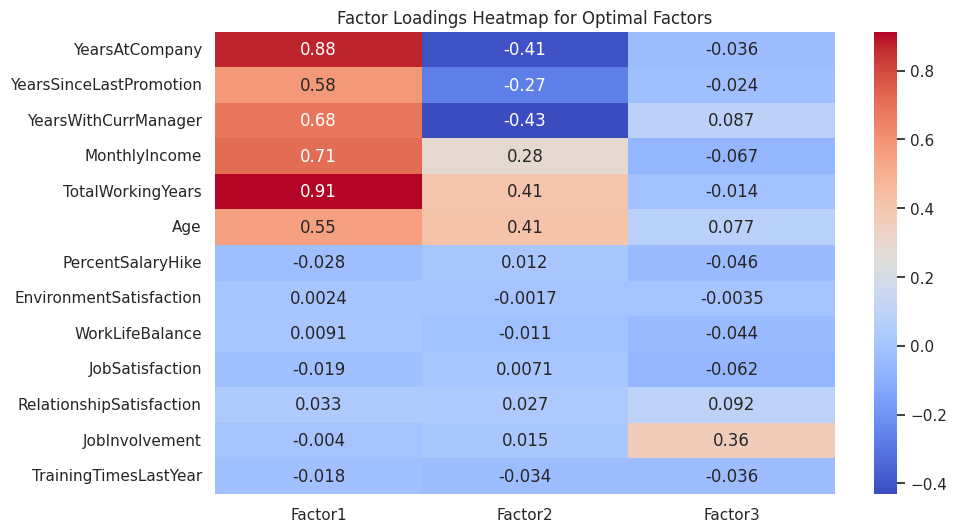

In [ ]:
# Fit a factor analysis with three factors and compute the factor loadings without rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 3
optimal_factors = 3

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fa_opt.fit(data_summary_raw)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_raw.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

Since there is some degree of cross-loadings (e.g. "TotalWorkingYears" and "Age") we will rotate the factors to reduce the degree of cross-loading

**Computing factor loadigns with rotating the factors**

Factor Loadings for Optimal Factors:
                            Factor1   Factor2   Factor3
YearsAtCompany            0.920524  0.294731 -0.019384
YearsSinceLastPromotion   0.608298  0.196349 -0.012720
YearsWithCurrManager      0.792940  0.141868  0.094906
MonthlyIncome             0.330189  0.694566 -0.027661
TotalWorkingYears         0.392096  0.919834  0.038315
Age                       0.125405  0.675155  0.115715
PercentSalaryHike        -0.028847 -0.007606 -0.046244
EnvironmentSatisfaction   0.002980  0.000575 -0.003426
WorkLifeBalance           0.014061  0.000706 -0.044411
JobSatisfaction          -0.018525 -0.003908 -0.062370
RelationshipSatisfaction  0.006323  0.037118  0.094264
JobInvolvement           -0.013454 -0.011824  0.360636
TrainingTimesLastYear     0.009458 -0.035283 -0.037652


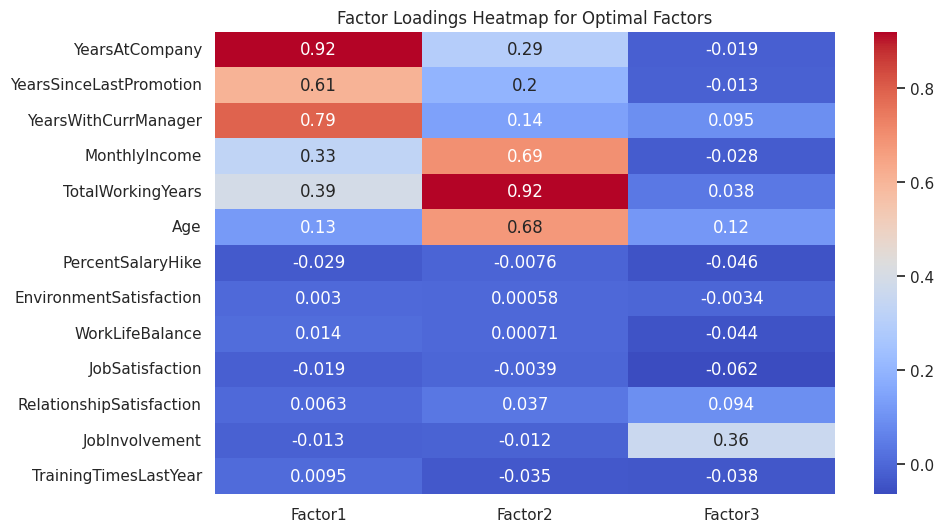

In [ ]:
# Fit a factor analysis with four factors and compute the factor loadings with rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 3
optimal_factors = 3

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa_opt.fit(data_summary_raw)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_raw.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

After we rotated the factors to reduce the number of cross-loadings, we can see that a three factor solution is not working since there are no relevant factor-loadings related to factor three.

*Note:*
*We used all verimax, quartimax and equamax. They had barely differences in the cross-loadings, so we decided for the verimax rotation since it still provided the most distinct differences in cross loadings.*

*For our respective codes for the quartimax & equamax, we had to alter the section "# Perform EFA with the optimal number of factors" to:*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='quartimax')*
*fa_opt.fit(data_summary_raw)*

*and*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='equamax')*
*fa_opt.fit(data_summary_raw)*

### **5.2.2 Dataset with log-transformed data**



Since our dataset consisting of the raw data could neither fulfill the percentage of variance criterion nor provide us with factor number based on the eigenvalues, with factors relating to all our chosen variables, it will be used a **log transformation** to the continuous data, to reduce the effect of outliers.

#### 1) Assess correlation matrix and check requirements

Since we now have different values for our continuous variables, we need to conduct a new statistic summary table

**Asses correlation matrix**

In [ ]:
# Apply log1p transformation (log(1+x)) to avoid issues with zeros
selected_log_vars = [var + "_log" for var in selected_continuous_vars]
for var, selected_log_vars in zip(selected_continuous_vars, selected_log_vars):
    df[selected_log_vars] = np.log1p(df[var])

# Build log columns on the fly, then select ordinals + logs
df_with_logs = df.assign(**{f"{v}_log": np.log1p(df[v]) for v in selected_continuous_vars if v in df.columns})
data_summary_log = df_with_logs[[f"{v}_log" for v in selected_continuous_vars] + list(selected_ordinal_vars)]

# Calculate summary statistics
summary_stats_log = data_summary_log.describe().T[['count', 'mean', 'std', 'min', 'max']]

# Calculate correlations with other variables
correlations_log = data_summary_log.corr(method='spearman') #Use Spearman coefficient since we include a lot of ordinal variables

# Merge summary statistics and correlation information
summary_table_log = summary_stats_log.join(correlations_log, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns_log = (['N', 'Mean', 'S.D.', 'Min', 'Max'] +
    [f'({i+1})' for i in range(correlations_log.shape[1])])

# Print the summary table
summary_table_log = np.round(summary_table_log,2)
summary_table_log


,count,mean,std,min,max,YearsAtCompany_log,YearsSinceLastPromotion_log,YearsWithCurrManager_log,MonthlyIncome_log,TotalWorkingYears_log,Age_log,PercentSalaryHike_log,EnvironmentSatisfaction,WorkLifeBalance,JobSatisfaction,RelationshipSatisfaction,JobInvolvement,TrainingTimesLastYear
YearsAtCompany_log,1470.0,1.81,0.76,0.00,3.71,1.00,0.52,0.84,0.46,0.59,0.25,-0.05,0.01,0.00,0.01,-0.00,0.01,0.00
YearsSinceLastPromotion_log,1470.0,0.79,0.81,0.00,2.77,0.52,1.00,0.47,0.26,0.33,0.17,-0.06,0.03,0.00,0.01,0.04,-0.01,0.01
YearsWithCurrManager_log,1470.0,1.35,0.81,0.00,2.89,0.84,0.47,1.00,0.37,0.50,0.19,-0.03,-0.00,-0.00,-0.02,0.00,0.04,-0.01
MonthlyIncome_log,1470.0,8.55,0.66,6.92,9.90,0.46,0.26,0.37,1.00,0.71,0.47,-0.03,-0.02,0.03,0.00,0.00,-0.02,-0.03
TotalWorkingYears_log,1470.0,2.29,0.70,0.00,3.71,0.59,0.33,0.50,0.71,1.00,0.66,-0.03,-0.01,0.00,-0.02,0.00,0.01,-0.01
Age_log,1470.0,3.61,0.24,2.94,4.11,0.25,0.17,0.19,0.47,0.66,1.00,0.01,0.01,-0.00,-0.01,0.05,0.03,0.00
PercentSalaryHike_log,1470.0,2.76,0.21,2.48,3.26,-0.05,-0.06,-0.03,-0.03,-0.03,0.01,1.00,-0.03,0.00,0.02,-0.03,-0.02,-0.00
EnvironmentSatisfaction,1470.0,2.72,1.09,1.00,4.00,0.01,0.03,-0.00,-0.02,-0.01,0.01,-0.03,1.00,0.03,-0.00,0.01,-0.02,-0.01
WorkLifeBalance,1470.0,2.76,0.71,1.00,4.00,0.00,0.00,-0.00,0.03,0.00,-0.00,0.00,0.03,1.00,-0.03,0.02,-0.02,0.02
JobSatisfaction,1470.0,2.73,1.10,1.00,4.00,0.01,0.01,-0.02,0.00,-0.02,-0.01,0.02,-0.00,-0.03,1.00,-0.01,-0.01,-0.01


**Correlation matrix heatmap**

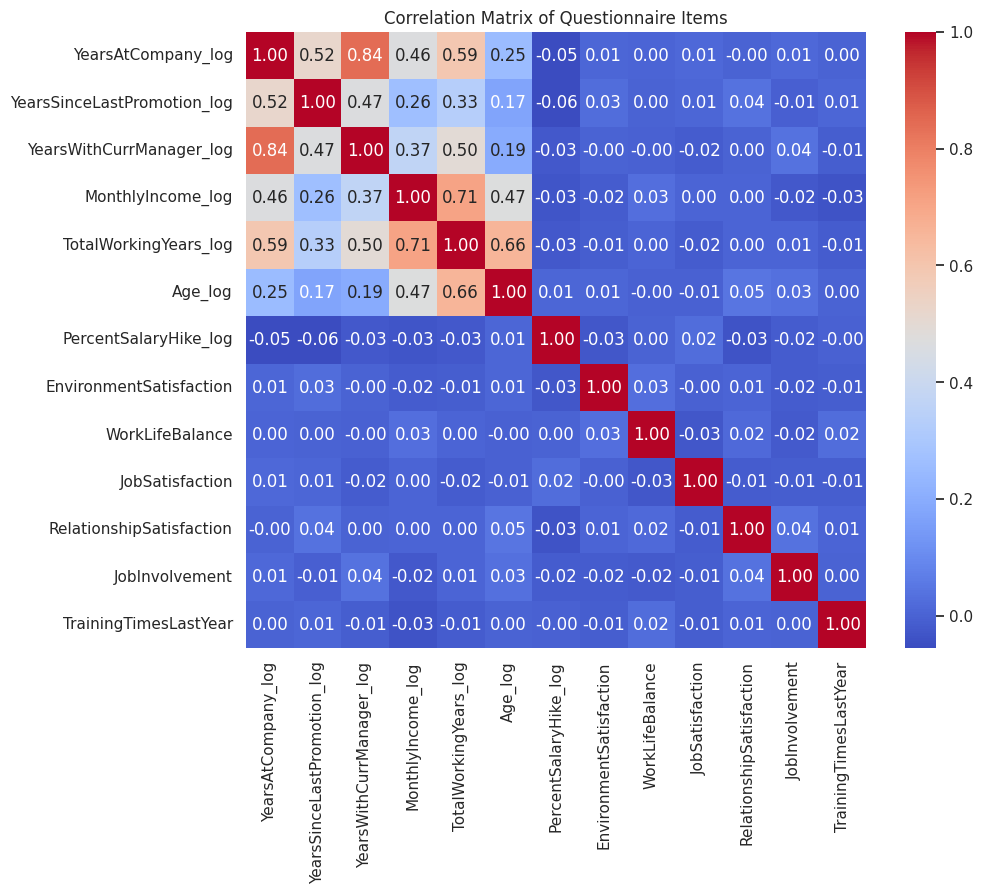

In [ ]:
# Check for if factor analysis is possible: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_summary_log.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f') #Using Spearman´s coefficient since we are also taken non-metric data into account
plt.title("Correlation Matrix of Questionnaire Items")
plt.show()

The correlation-matrix heatmap already indicates that transformation did not help in increasing the correlation between the variables

**Kaiser-Meyer-Olkin (KMO)**

In [ ]:
# Perform Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy
kmo_all, kmo_model = calculate_kmo(data_summary_log)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8)")

KMO Model Score: 0.751 (must be > 0.5; should be > 0.8)


The KMO score is similar to our score without the index.

Therefore, it is not ideally but accepatble to move on.

#### 2) Extract factors from Variables

**Kaiser Criterion (Eigenvalues)**

In [ ]:
# Perform the Factor Analysis without specifying the number of factors to generate eigenvalues
fa = FactorAnalyzer(n_factors=data_summary_log.shape[1], rotation=None)
fa.fit(data_summary_log)

# Get eigenvalues
eigenvalues_log, _ = fa.get_eigenvalues()

eigenvalues_log

array([3.42865563, 1.20686412, 1.08388737, 1.04626584, 1.01957064,
       0.99304563, 0.97375623, 0.94948535, 0.93852301, 0.56461338,
       0.46018216, 0.18421813, 0.15093249])

Again, we have theortically five factors exceeding an eigenvalue of 1

**Elbow criterion**

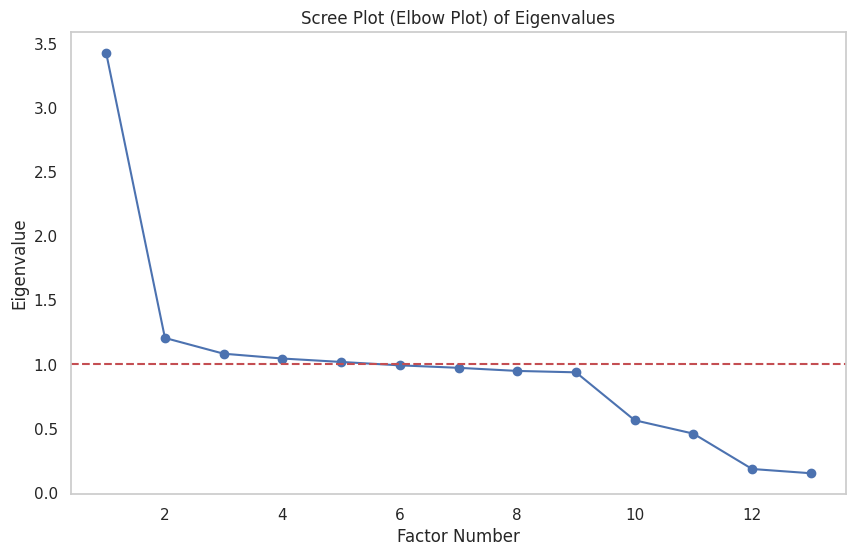

In [ ]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, data_summary_log.shape[1] + 1), eigenvalues_log, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

The elbow plot shows us similar to before that we have a sharp drop after the first factor, with the fourth and fifth factor barely passing the threshold.

**Percentage of variance criterion**

In [ ]:
# Compute how much variance different factor solutions explain.

# Perform EFA with n_factors=number of variables
# Factor solution
fa_solution1_log = FactorAnalyzer(n_factors=9, rotation=None).fit(data_summary_log)
variance_explained_fa_solution1_log = fa_solution1_log.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1_log[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1_log[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [0.24699436 0.07236197 0.01597883 0.01444506 0.01066505 0.00864328
 0.00668622 0.00478972 0.00323814]
Cumulative variance explained:
 [0.24699436 0.31935633 0.33533516 0.34978022 0.36044527 0.36908856
 0.37577478 0.3805645  0.38380264]


Again, the percentage of value criterion is not fulfilled, with not even reaching the overall cumulative value of the raw data.

#### 3) Optimize factors and assess factor loadings

Since the criteria to assess the number of factors led to same conclusions, we will again look at a three factor solution for direct comparison.

**Computing factor loadigns without rotating the factors**

Factor Loadings for Optimal Factors:
                               Factor1   Factor2   Factor3
YearsAtCompany_log           0.872091 -0.413758 -0.023071
YearsSinceLastPromotion_log  0.535519 -0.232777  0.091752
YearsWithCurrManager_log     0.734937 -0.446079 -0.022554
MonthlyIncome_log            0.677576  0.294107 -0.004927
TotalWorkingYears_log        0.905349  0.403308 -0.069172
Age_log                      0.554367  0.450089  0.074332
PercentSalaryHike_log       -0.039984  0.029603 -0.149663
EnvironmentSatisfaction     -0.000631 -0.022667  0.093948
WorkLifeBalance              0.008104 -0.001811  0.061749
JobSatisfaction             -0.010660 -0.007150 -0.065160
RelationshipSatisfaction     0.015189  0.018586  0.275859
JobInvolvement               0.019856 -0.012444  0.074008
TrainingTimesLastYear       -0.024726 -0.019160  0.018719


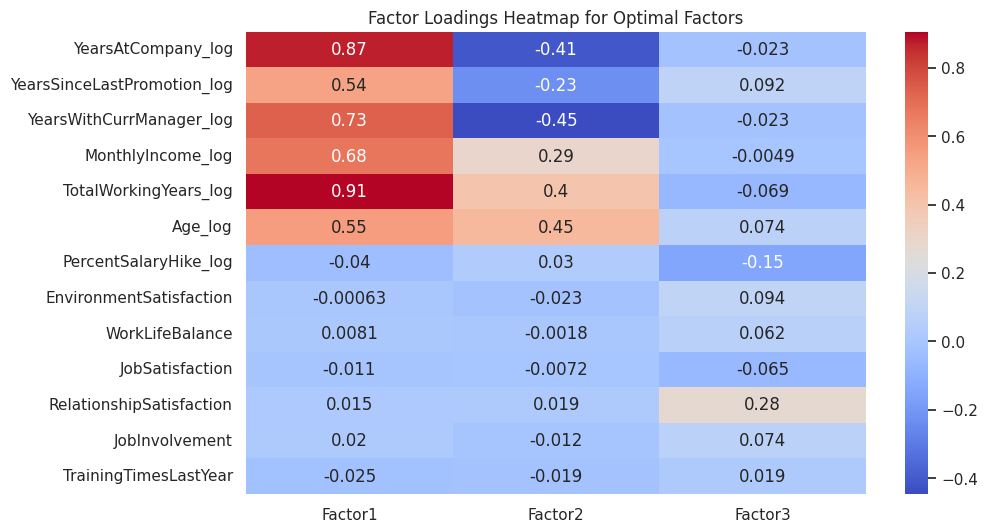

In [ ]:
# Fit a factor analysis with three factors and compute the factor loadings without rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 3
optimal_factors = 3

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fa_opt.fit(data_summary_log)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_log.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

**Computing factor loadigns with rotating the factors**

Factor Loadings for Optimal Factors:
                               Factor1   Factor2   Factor3
YearsAtCompany_log           0.917232  0.297057  0.052093
YearsSinceLastPromotion_log  0.541819  0.192168  0.137432
YearsWithCurrManager_log     0.840024  0.179678  0.041261
MonthlyIncome_log            0.289308  0.677777  0.050509
TotalWorkingYears_log        0.383488  0.916521  0.005071
Age_log                      0.087904  0.702622  0.118417
PercentSalaryHike_log       -0.039673  0.002270 -0.152627
EnvironmentSatisfaction      0.009068 -0.022000  0.093671
WorkLifeBalance              0.003149  0.000887  0.062219
JobSatisfaction              0.001370 -0.008968 -0.065790
RelationshipSatisfaction    -0.019468  0.008982  0.276070
JobInvolvement               0.018172  0.000531  0.075470
TrainingTimesLastYear       -0.005964 -0.031866  0.016670


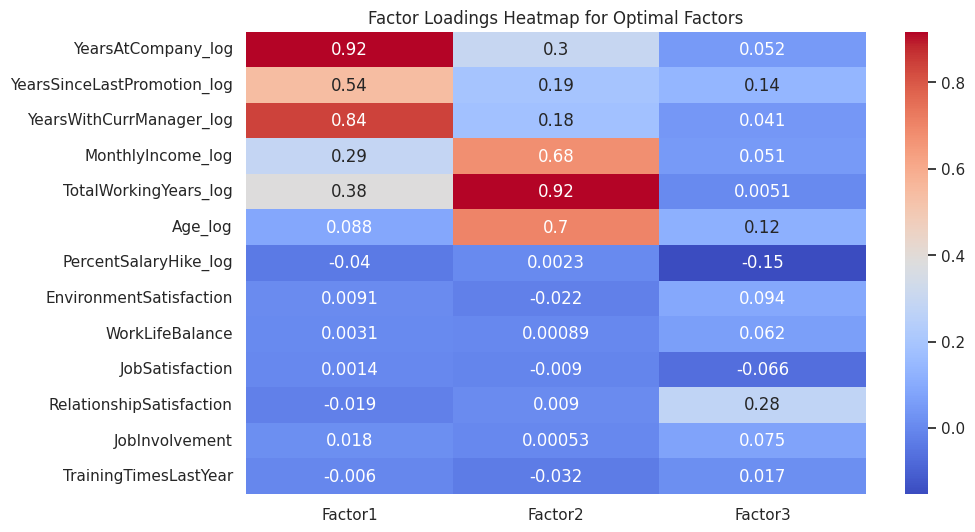

In [ ]:
# Fit a factor analysis with four factors and compute the factor loadings with rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 3
optimal_factors = 3

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa_opt.fit(data_summary_log)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_log.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

After using verimax, quartimax and equamax rotation, we still have the problem that all our variables starting at "PercentSalaryHike" are not related to any factor and there no major loadings related to factor three.

*Note: respective alteration in code for the quartimax and equamax rotation*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='quartimax')*

*and*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='equamax')*

### **5.2.3 Dataset with standardized Variables**

Since the log transformation did not improve the propositions of our analysis, we **standardize both our continuous & ordinal variables** since normally distributed data is most promising for a factor analysis.

#### 1) Assess correlation matrix and check requirements

**Asses correlation matrix**

In [ ]:
# Standardize both continous and ordinal variables
cols = [c for c in (selected_continuous_vars + selected_ordinal_vars) if c in df.columns]
data_summary_std = df[cols].apply(pd.to_numeric, errors='coerce').pipe(lambda d: (d - d.mean())/d.std(ddof=0))

# Calculate summary statistics
summary_stats_std = data_summary_std.describe().T[['count', 'mean', 'std', 'min', 'max']]

# Calculate correlations with other variables
correlations_std = data_summary_std.corr(method='spearman') #Use Spearman coefficient since we include a lot of ordinal variables

# Merge summary statistics and correlation information
summary_table_std = summary_stats_std.join(correlations_std, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns_std = (['N', 'Mean', 'S.D.', 'Min', 'Max'] +
    [f'({i+1})' for i in range(correlations_std.shape[1])])

# Print the summary table
summary_table_std = np.round(summary_table_std,2)
summary_table_std


,count,mean,std,min,max,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,TotalWorkingYears,Age,PercentSalaryHike,EnvironmentSatisfaction,WorkLifeBalance,JobSatisfaction,RelationshipSatisfaction,JobInvolvement,TrainingTimesLastYear
YearsAtCompany,1470.0,-0.0,1.0,-1.14,5.39,1.00,0.52,0.84,0.46,0.59,0.25,-0.05,0.01,0.00,0.01,-0.00,0.01,0.00
YearsSinceLastPromotion,1470.0,0.0,1.0,-0.68,3.98,0.52,1.00,0.47,0.26,0.33,0.17,-0.06,0.03,0.00,0.01,0.04,-0.01,0.01
YearsWithCurrManager,1470.0,-0.0,1.0,-1.16,3.61,0.84,0.47,1.00,0.37,0.50,0.19,-0.03,-0.00,-0.00,-0.02,0.00,0.04,-0.01
MonthlyIncome,1470.0,-0.0,1.0,-1.17,2.87,0.46,0.26,0.37,1.00,0.71,0.47,-0.03,-0.02,0.03,0.00,0.00,-0.02,-0.03
TotalWorkingYears,1470.0,-0.0,1.0,-1.45,3.69,0.59,0.33,0.50,0.71,1.00,0.66,-0.03,-0.01,0.00,-0.02,0.00,0.01,-0.01
Age,1470.0,-0.0,1.0,-2.07,2.53,0.25,0.17,0.19,0.47,0.66,1.00,0.01,0.01,-0.00,-0.01,0.05,0.03,0.00
PercentSalaryHike,1470.0,0.0,1.0,-1.15,2.68,-0.05,-0.06,-0.03,-0.03,-0.03,0.01,1.00,-0.03,0.00,0.02,-0.03,-0.02,-0.00
EnvironmentSatisfaction,1470.0,0.0,1.0,-1.58,1.17,0.01,0.03,-0.00,-0.02,-0.01,0.01,-0.03,1.00,0.03,-0.00,0.01,-0.02,-0.01
WorkLifeBalance,1470.0,-0.0,1.0,-2.49,1.75,0.00,0.00,-0.00,0.03,0.00,-0.00,0.00,0.03,1.00,-0.03,0.02,-0.02,0.02
JobSatisfaction,1470.0,-0.0,1.0,-1.57,1.15,0.01,0.01,-0.02,0.00,-0.02,-0.01,0.02,-0.00,-0.03,1.00,-0.01,-0.01,-0.01


Since we standardized, we have to look at the values from another perspective. A minimum value in Years at the Company does not mean that an employee stayed for a negative amount of years at the company, but it means that they stayed 1.14 years less than the average employee. The values must be seen in comparison to the mean.

**Correlation matrix heatmap**

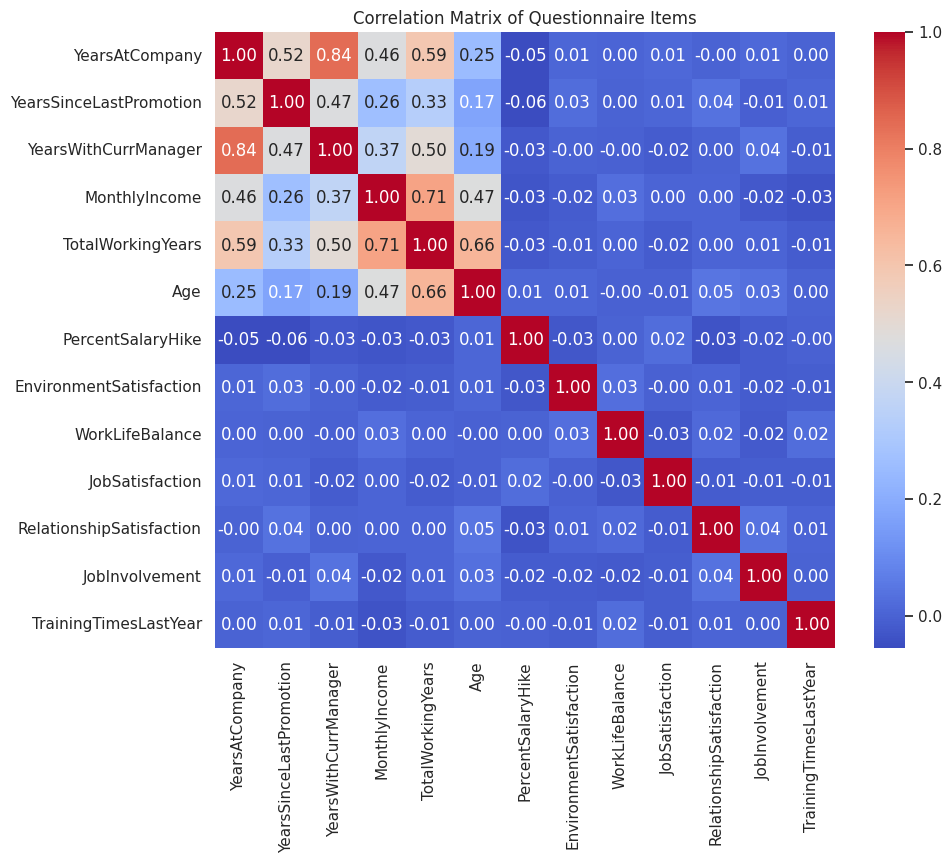

In [ ]:
# Check for if factor analysis is possible: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_summary_std.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Questionnaire Items")
plt.show()

Again, the correlation matrix already indicates that the respective variables will probably not reveal any patterns.

**Kaiser-Meyer-Olkin (KMO)**

In [ ]:
# Perform Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy
kmo_all, kmo_model = calculate_kmo(data_summary_std)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8)")

KMO Model Score: 0.753 (must be > 0.5; should be > 0.8)


We can move on to the extracting factors. Even though we can already indicat that the standardization did not help to improve the factor-loadings, we will still move on to extracting the factors for reason of comparison.

#### 2) Extract factors from Variables

**Kaiser Criterion (Eigenvalues)**

In [ ]:
# Perform the Factor Analysis without specifying the number of factors to generate eigenvalues
fa = FactorAnalyzer(n_factors=data_summary_std.shape[1], rotation=None)
fa.fit(data_summary_std)

# Get eigenvalues
eigenvalues_std, _ = fa.get_eigenvalues()

eigenvalues_std

array([3.47386882, 1.19132291, 1.08425871, 1.03951611, 1.01974987,
       0.99226308, 0.97285221, 0.95134436, 0.93697671, 0.51672554,
       0.47147686, 0.19921784, 0.15042698])

**Elbow criterion**

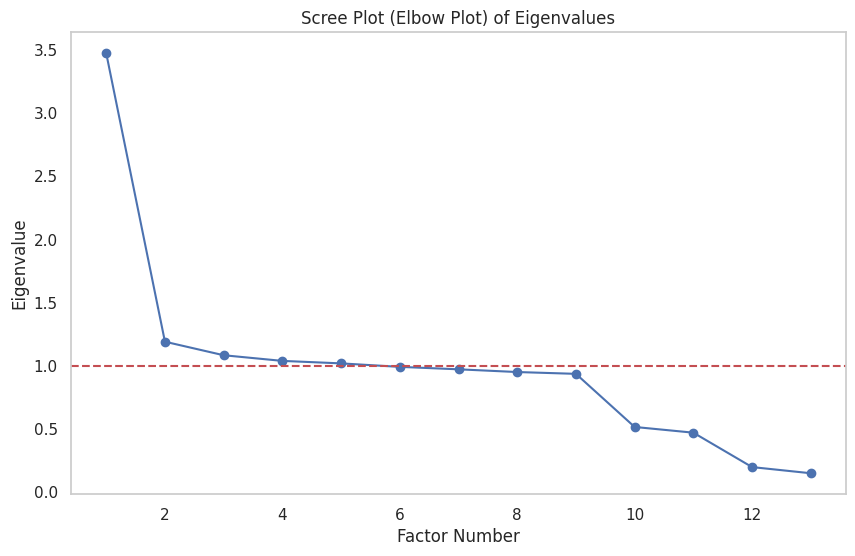

In [ ]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, data_summary_std.shape[1] + 1), eigenvalues_std, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

**Percentage of variance criterion**

In [ ]:
# Compute how much variance different factor solutions explain.

# Perform EFA with n_factors=number of variables
# Factor solution
fa_solution1_std = FactorAnalyzer(n_factors=9, rotation=None).fit(data_summary_std)
variance_explained_fa_solution1_std = fa_solution1_std.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1_std[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1_std[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [0.25119915 0.0731147  0.0220268  0.01548759 0.01353803 0.01116309
 0.00766714 0.00587313 0.00387647]
Cumulative variance explained:
 [0.25119915 0.32431384 0.34634064 0.36182823 0.37536625 0.38652935
 0.39419649 0.40006962 0.40394609]


#### 3) Optimize factors and assess factor loadings

Since all our results in extracting factors are similar to before, we again used a three factors solution using a verimax rotation for optimization.

**Computing factor loadigns without rotating the factors**

Factor Loadings for Optimal Factors:
                            Factor1   Factor2   Factor3
YearsAtCompany            0.875132 -0.409190 -0.036238
YearsSinceLastPromotion   0.579380 -0.269233 -0.023947
YearsWithCurrManager      0.682276 -0.429992  0.086566
MonthlyIncome             0.711977  0.284250 -0.067095
TotalWorkingYears         0.912596  0.410213 -0.014022
Age                       0.553929  0.414916  0.077187
PercentSalaryHike        -0.028130  0.012071 -0.045733
EnvironmentSatisfaction   0.002446 -0.001743 -0.003454
WorkLifeBalance           0.009092 -0.010869 -0.044382
JobSatisfaction          -0.018666  0.007109 -0.062044
RelationshipSatisfaction  0.033430  0.026853  0.092004
JobInvolvement           -0.003961  0.015452  0.360728
TrainingTimesLastYear    -0.018406 -0.033860 -0.035590


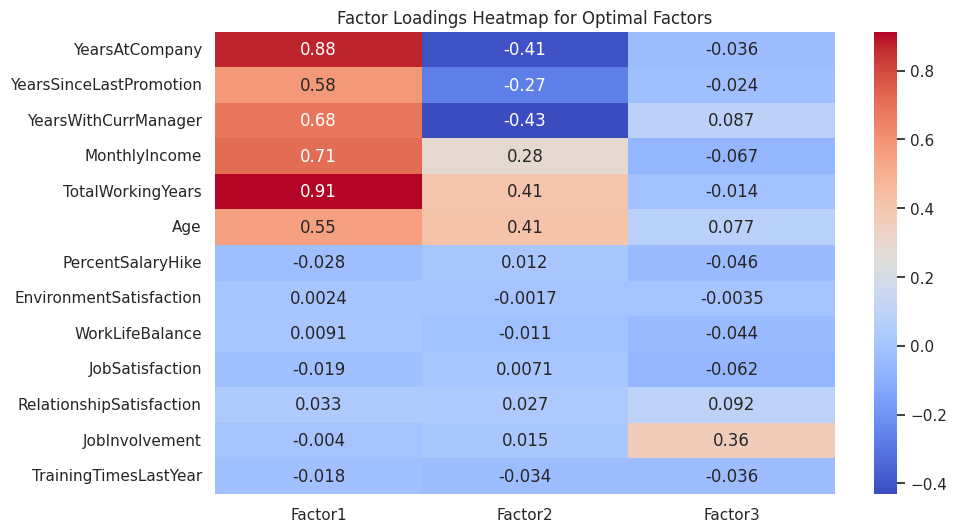

In [ ]:
# Fit a factor analysis with three factors and compute the factor loadings without rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 3
optimal_factors = 3

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fa_opt.fit(data_summary_std)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_std.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

**Computing factor loadigns with rotating the factors**

Factor Loadings for Optimal Factors:
                            Factor1   Factor2   Factor3
YearsAtCompany            0.920524  0.294731 -0.019384
YearsSinceLastPromotion   0.608298  0.196349 -0.012719
YearsWithCurrManager      0.792940  0.141868  0.094906
MonthlyIncome             0.330189  0.694566 -0.027661
TotalWorkingYears         0.392096  0.919834  0.038315
Age                       0.125405  0.675155  0.115715
PercentSalaryHike        -0.028847 -0.007606 -0.046244
EnvironmentSatisfaction   0.002980  0.000575 -0.003426
WorkLifeBalance           0.014061  0.000706 -0.044411
JobSatisfaction          -0.018525 -0.003908 -0.062370
RelationshipSatisfaction  0.006323  0.037118  0.094264
JobInvolvement           -0.013454 -0.011824  0.360636
TrainingTimesLastYear     0.009458 -0.035283 -0.037652


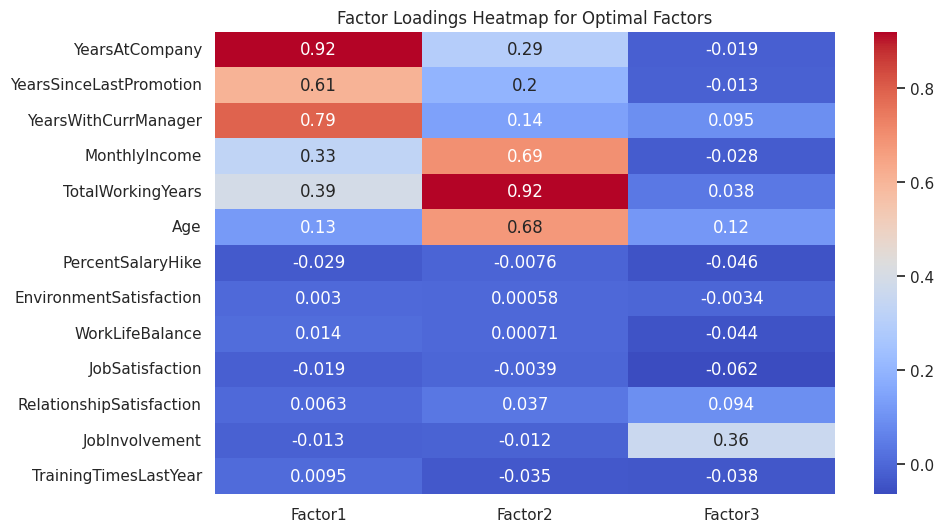

In [ ]:
# Fit a factor analysis with four factors and compute the factor loadings with rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 3
optimal_factors = 3

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa_opt.fit(data_summary_std)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_std.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

*Note: Respective codes for quartimax and equamax rotation*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='quartimax')*

*and*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='equamax')*

After using standardization and log-transformation, to alter our data to potentially derive more promising results, we can conclude that we have variables in our current data set, which are not contributing to reveal any patterns.

Since we can clearly see that there is a two factor solution, **we will move on to alter our dataset in exluding the non-revealing variables**. This leads to excluding all variables related to the field of "satisfaction".

Additionally, we can clearly see that one factor is revealing a pattern in tenure and the other one is revealing a pattern in seniority. **Therefore, we will alter our hypothesis to the following:**

**H0**: Tenure and Seniority have no significant effect on the likelihood of employee attrition

**H1**: Tenure and Senirority have significant effect on the likelihood of employee attrition

### **5.2.4 Dataset without non-revealing Variables**

Since both transformation and standardization had negligible effects on the factor loadings, we proceeded with the original data. Standardization expressed variable values relative to the mean, occasionally resulting in unrealistic negative values (e.g., for years). Given that these adjustments did not meaningfully alter the loadings, we chose to retain the raw data to preserve interpretability.

#### 1) Define relevant dataset

In [ ]:
# Select our identified columns
final_vars = ["YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager",
              "TotalWorkingYears", "MonthlyIncome","Age"]

# Define relevant columns for final data version
data_summary_final = df[final_vars]

#### 2) Assess correlation matrix and check requirements

**Asses correlation matrix**

In [ ]:
# Calculate summary statistics
summary_stats_final = data_summary_final.describe().T[['count', 'mean', 'std', 'min', 'max']]

# Calculate correlations with other variables
correlations_final = data_summary_final.corr(method='pearson') #Since we now only have metric data, we can consider the Pearson coefficient

# Merge summary statistics and correlation information
summary_table_final = summary_stats_final.join(correlations_final, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns_final= (['N', 'Mean', 'S.D.', 'Min', 'Max'] +
    [f'({i+1})' for i in range(correlations_final.shape[1])])

# Print the summary table
summary_table_final = np.round(summary_table_final,2)
summary_table_final


,count,mean,std,min,max,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,MonthlyIncome,Age
YearsAtCompany,1470.0,7.01,6.13,0.0,40.0,1.00,0.62,0.77,0.63,0.51,0.31
YearsSinceLastPromotion,1470.0,2.19,3.22,0.0,15.0,0.62,1.00,0.51,0.40,0.34,0.22
YearsWithCurrManager,1470.0,4.12,3.57,0.0,17.0,0.77,0.51,1.00,0.46,0.34,0.20
TotalWorkingYears,1470.0,11.28,7.78,0.0,40.0,0.63,0.40,0.46,1.00,0.77,0.68
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,19999.0,0.51,0.34,0.34,0.77,1.00,0.50
Age,1470.0,36.92,9.14,18.0,60.0,0.31,0.22,0.20,0.68,0.50,1.00


**Correlation matrix heatmap**

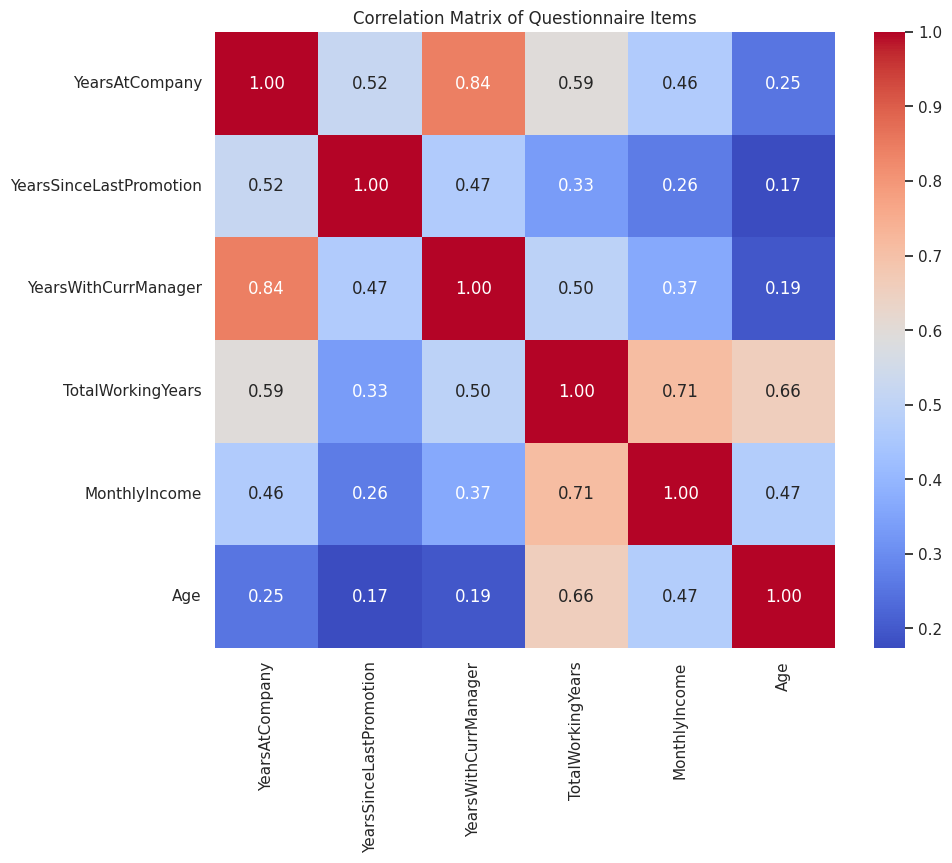

In [ ]:
# Check for if factor analysis is possible: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_summary_final.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Questionnaire Items")
plt.show()

Now, we can already see that we have no variables being merely uncorrelated to other variables, so our variables will probably now reveal some patterns

**Kaiser-Mayer-Olkin (KMO)**

In [ ]:
# Perform Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy
kmo_all, kmo_model = calculate_kmo(data_summary_final)
print(f"KMO Model Score: {kmo_model:.3f} (must be > 0.5; should be > 0.8 for acceptable factor analysis)")

KMO Model Score: 0.757 (must be > 0.5; should be > 0.8 for acceptable factor analysis)


We again exceeded the minimum threshold to conduct a factor analysis

#### 3) Extract factors from Variables

In [ ]:
# Perform the Factor Analysis without specifying the number of factors to generate eigenvalues
fa = FactorAnalyzer(n_factors=data_summary_final.shape[1], rotation=None)
fa.fit(data_summary_final)

# Get eigenvalues
eigenvalues_final, _ = fa.get_eigenvalues()

eigenvalues_final

array([3.47033629, 1.1794885 , 0.52035895, 0.4781055 , 0.20041563,
       0.15129512])

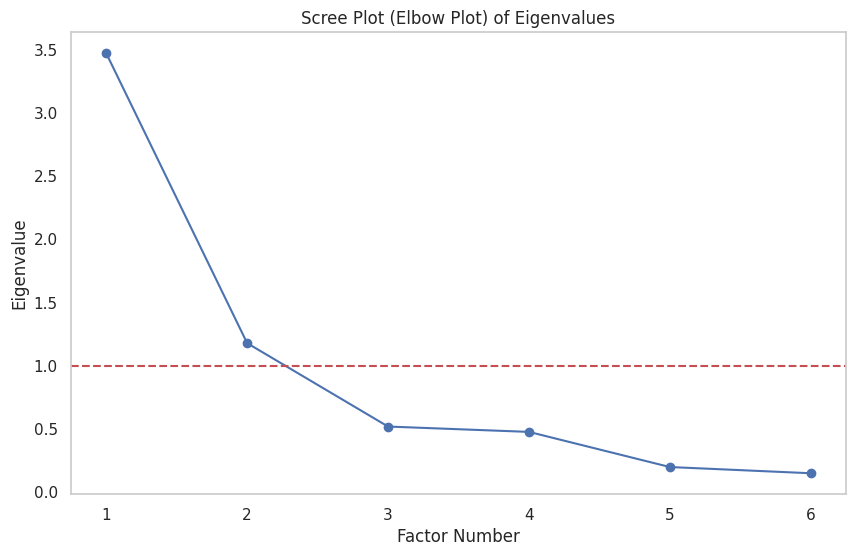

In [ ]:
# Plot the eigenvalues (Scree Plot / Elbow Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, data_summary_final.shape[1] + 1), eigenvalues_final, marker='o')
plt.title('Scree Plot (Elbow Plot) of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # The Kaiser criterion line (eigenvalue = 1)
plt.grid()
plt.show()

Both criteria indicate clearly a two factor solution, with the elbow plot visualizing that our first factor is responsible for the largest part of our correlations.

In [ ]:
# Compute how much variance different factor solutions explain.

# Perform EFA with n_factors=number of variables
# Factor solution
fa_solution1_final = FactorAnalyzer(n_factors=9, rotation=None).fit(data_summary_final)
variance_explained_fa_solution1_final = fa_solution1_final.get_factor_variance()
print("\nVariance explained by different factor solution:")
print("Variance explained by each factor:\n", variance_explained_fa_solution1_final[1])
print("Cumulative variance explained:\n", variance_explained_fa_solution1_final[2])


Variance explained by different factor solution:
Variance explained by each factor:
 [5.38914172e-01 1.45727304e-01 1.71195996e-02 9.55660907e-03
 3.30227366e-04 0.00000000e+00]
Cumulative variance explained:
 [0.53891417 0.68464148 0.70176108 0.71131768 0.71164791 0.71164791]


In contrast, to the variations we run before, we now have a dataset passing the percentage of variance criterion, showing that two factors explain the more than 60% of the total variation.

#### 4) Optimize factors and assess factor loadings

**Computing factor loadigns without rotating the factors**

Factor Loadings for Optimal Factors:
                           Factor1   Factor2
YearsAtCompany           0.876901 -0.411600
YearsSinceLastPromotion  0.579545 -0.270247
YearsWithCurrManager     0.679365 -0.422924
TotalWorkingYears        0.913046  0.412893
MonthlyIncome            0.710932  0.284724
Age                      0.551740  0.408638


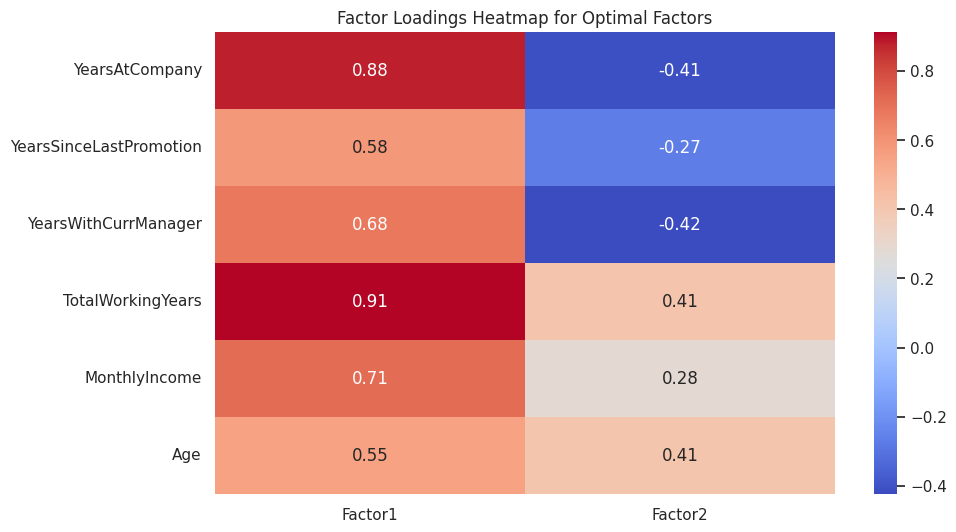

In [ ]:
# Fit a factor analysis with three factors and compute the factor loadings without rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 2
optimal_factors = 2

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation=None)
fa_opt.fit(data_summary_final)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_final.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

**Computing factor loadigns with rotating the factors**

Factor Loadings for Optimal Factors:
                           Factor1   Factor2
YearsAtCompany           0.916420  0.313916
YearsSinceLastPromotion  0.604426  0.208747
YearsWithCurrManager     0.782326  0.168426
TotalWorkingYears        0.369107  0.931608
MonthlyIncome            0.312967  0.698959
Age                      0.112397  0.677325


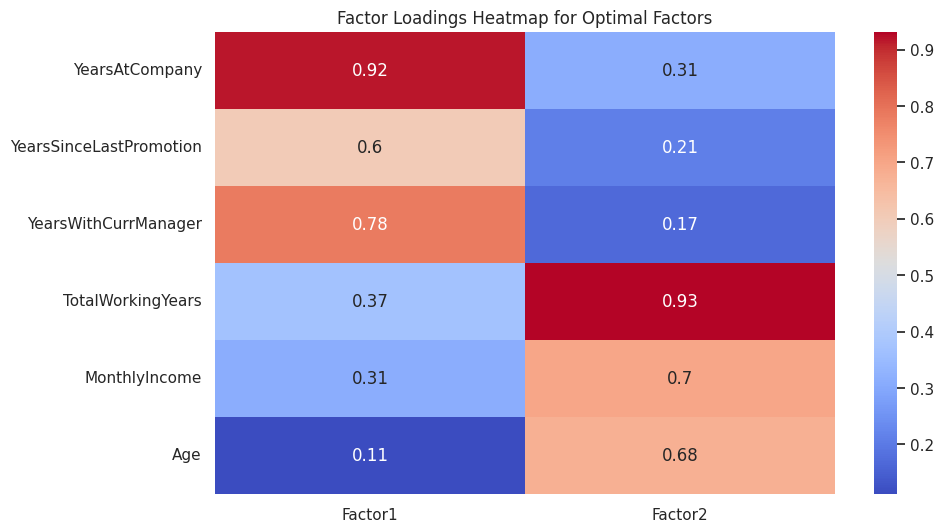

In [ ]:
# Fit a factor analysis with four factors and compute the factor loadings with rotating the factors
# Based on the elbow plot, let's assume the optimal number of factors is 2
optimal_factors = 2

# Perform EFA with the optimal number of factors
fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa_opt.fit(data_summary_final)

# Extract factor loadings
loadings_opt = fa_opt.loadings_
columns = data_summary_final.columns

# Display factor loadings
factor_loadings_df_opt = pd.DataFrame(loadings_opt, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Factor Loadings for Optimal Factors:\n", factor_loadings_df_opt)

# We can visualize the factor loadings using a heatmap from the seaborn library
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings_df_opt, annot=True, cmap='coolwarm', cbar=True)
plt.title("Factor Loadings Heatmap for Optimal Factors")
plt.show()

*Note: Code for quartimax & equamax rotation*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='quartimax')*

*and*

*fa_opt = FactorAnalyzer(n_factors=optimal_factors, rotation='equamax')*

The results show that we have factor-loadings revealing to patterns.

**Factor 1** consisting of "YearsAtCompany", "YearsSinceLastPromotion" and "YearsWithCurrManager" describe clearly the **tenure of an employee** in their current work environment.

**Factor 2** ("TotalWorkingYears", "Age", "MonthlyIncome") on the other hand, describes the **seniority in the company**. Older people and people with more overall working years are usually more experienced. Experience on the other hand relates often to better results, leading to higher probability of being in higher positions with higher salary. Therefore, there could be a problem of multicollinearity, which we will assess in the following sections.

### **5.2.5 Compute factor scores and assess factor reliability**

**Create new factor variables**

We could use a linear regression to compute factor scores. But since our variables are all on the same scale and have equal factor loadings, we can also just take the mean of their associated variables.

In [ ]:
# Compute the new factor variables by taking the mean of the original variables. Use the initial data set to compute the factors.

# Factor 1: Tenure
data_summary_final['f1_tenure'] = data_summary_final[['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis=1)
# Factor 2: Seniority
data_summary_final['f2_seniority'] = data_summary_final[['TotalWorkingYears', 'MonthlyIncome', 'Age']].mean(axis=1)

data_summary_final


,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,MonthlyIncome,Age,f1_tenure,f2_seniority
0,6,0,5,8,5993,41,3.666667,2014.000000
1,10,1,7,10,5130,49,6.000000,1729.666667
2,0,0,0,7,2090,37,0.000000,711.333333
3,8,3,0,8,2909,33,3.666667,983.333333
4,2,2,2,6,3468,27,2.000000,1167.000000
...,...,...,...,...,...,...,...,...
1465,5,0,3,17,2571,36,2.666667,874.666667
1466,7,1,7,9,9991,39,5.000000,3346.333333
1467,6,0,3,6,6142,27,3.000000,2058.333333
1468,9,0,8,17,5390,49,5.666667,1818.666667


**Compute Cronbachs Alpha**

To assess the reliability of our factors, we compute Cronbach's alpha.  We use the pingouin library to compute Cronbach's alpha.

*Install pingouin library*

In [ ]:
%pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.0 MB/s eta 0:00:00


In [ ]:
# Compute the cronbach alphas for each factor

# Import the library
import pingouin as pg

# Compute alphas for each factor
alpha_f1 = pg.cronbach_alpha(data=data_summary_final[['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])
alpha_f2 = pg.cronbach_alpha(data=data_summary_final[['TotalWorkingYears','MonthlyIncome', 'Age']])

# Print alphas
print(f"Alpha factor 1 (tenure): {alpha_f1[0]:.3f} (should be > 0.7)")
print(f"Alpha factor 2 (seniority): {alpha_f2[0]:.3f} (should be > 0.7)")



Alpha factor 1 (tenure): 0.803 (should be > 0.7)
Alpha factor 2 (seniority): 0.007 (should be > 0.7)


While the Alpha of tenure exceeds the threshold of 0.7, the alpha of seniority is far below the threshold indicating the there is no acceptable reliability in this factor, meaning it is likely that not all of the identified variables desribe the same concept (low internal consistency).

We need to alter this factor now, to move on. Looking at the correlation factors, we assume that "MonthlyIncome" and "Age" might cause a reliability problem.

In [ ]:
# Compute the cronbach alphas for an alteration of factor 2

# Import the library
import pingouin as pg

# Compute alphas for each factor
alpha_f1 = pg.cronbach_alpha(data=data_summary_final[['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])
alpha_f2 = pg.cronbach_alpha(data=data_summary_final[['TotalWorkingYears', 'Age']])

# Print alphas
print(f"Alpha factor 1 (tenure): {alpha_f1[0]:.3f} (should be > 0.7)")
print(f"Alpha factor 2 (seniority): {alpha_f2[0]:.3f} (should be > 0.7)")



Alpha factor 1 (tenure): 0.803 (should be > 0.7)
Alpha factor 2 (seniority): 0.804 (should be > 0.7)


After investigating the different variations of the variables, we came to the conclusion, that "MonthlyIncome" does not describe the same dimension as "TotalWorkingYears" and "Age". Therefore, we exclude that variable from the factor and can move on since our alpha now lies at 0.8.

*Note:*

*Alpha of MonthlyIncome & Age: 0.004*

*Alpha of MonthlyIncome & TotalWorkingYears: 0.005*


## **5.3 Hypotheses testing - Logistic Regression with the Factors**

Now that we have extracted our factors, we can use them to answer our research questions.

We want to test whether these factors correlate with employee attrition. To investigate this we will use a regression model. Since attrition is a binary variable, we will conduct a **logistic regression**.

**Influence of the new factor variables on employee attrition  (logistic regression)**

In [ ]:
# Create a logistic regression model that assesses the relationship between the factors and attrition.

# Import libraries
import pandas as pd
import statsmodels.formula.api as smf

# Redefine seniority values
data_summary_final['f2_seniority_new'] = data_summary_final[['TotalWorkingYears', 'Age']].mean(axis=1)

# Import factors into dataframe
df[['f1_tenure', 'f2_seniority_new']] = data_summary_final[['f1_tenure', 'f2_seniority_new']]

# Fit the logistic regression model
model_logit = smf.logit(formula= 'Attrition ~ f1_tenure + f2_seniority_new', data=df).fit()

# Print the regression results summary
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.422036
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1467
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Oct 2025   Pseudo R-squ.:                 0.04451
Time:                        16:15:24   Log-Likelihood:                -620.39
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.815e-13
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0199      0.247     -0.081      0.936      -0.504       0.464
f1_tenure  



The logistic regression results presented in the table above estimate how our dimensions of tenure and seniority influence the likelihood of attrition.

Both dimensions analyzed exhibit statistically significant effects on attrition, as their p-values are below 0.05 (the conventional significance threshold).

Specifically, **Seniority** shows a negative effect on the likelihood on attrition with a coefficient of -0.0615, suggesting that as an employee’s experience increases, the likelihood of leaving the company decreases. This implicates that the company, should further focus on the hiring of experienced workforce in order to decrease attrition.
Similarly, **Seniority** has a negative effect of -0.0598 on the likelihood of attrition. So, the more time an employee spend at the company and in his work environment (Position & Time with the same manager), the less likely they are to leave. Since tenure can also be seen as loyalty to the company, these results are not surprising.

**Overall, the Multiple Logistic Regression table indicates both our factors significantly affect the probability of employee attrition, leading to the conclusion that we can reject H0.**

**VIF**

By computing the VIF, we can show that a factor analysis can mitigate a potential problem of multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = model_logit.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = model_logit.model.exog_names

# Excluding Intercept
vif = vif[vif["features"] != "Intercept"].reset_index(drop=True)

print(vif)


   VIF Factor          features
0    1.283059         f1_tenure
1    1.283059  f2_seniority_new


With a VIF >= 10 multicollinearity would be a problem. With both factors having a VIF of 1.3 we can clearly conclude that there is no problem of multicollinearity with our dimensions.

**Comparison to Full Model**

In [ ]:
#Overwrite variables in dataframe with standardized version
item_cols = ["YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager",
              "TotalWorkingYears", "MonthlyIncome","Age"]

# Fit the linear regression model
model_ols_full = smf.ols(
    formula='Attrition ~ YearsAtCompany + YearsSinceLastPromotion + YearsWithCurrManager + TotalWorkingYears + Age',
    data=df).fit()
print(model_ols_full.summary())

# Create a dataframe of independent variables
X = model_ols_full.model.exog

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = model_ols_full.model.exog_names
print(vif)




                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     15.01
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           2.13e-14
Time:                        16:15:24   Log-Likelihood:                -578.53
No. Observations:                1470   AIC:                             1169.
Df Residuals:                    1464   BIC:                             1201.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

If we compare the Factor to the Full Model, we can also see that the Full Model would have had no problem with multicollinearity. Since the variables do have higher VIF´s, the comparison still shows us that with our factor model we could mitgigate the problem of multicollinearity.

**Goodness-of-fit - R-squared metrics**

In [ ]:
n = len(df)  # number of observations

# McFadden's pseudo R-squared
mcfadden_r2 = 1 - (model_logit.llf / model_logit.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2}")

#Cox & Snell R-Squared
cox_snell_r2 = 1 - np.exp((model_logit.llnull - model_logit.llf) * 2 / n)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2}")

# Nagelkerke R-Squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(-model_logit.llnull * 2 / n))
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2}")

McFadden's pseudo R-squared: 0.044508027331565225
Cox & Snell pseudo R-squared: 0.038555009852915045
Nagelkerke pseudo R-squared: -0.027168911798157433


In this case, the *McFadden’s R²* of 0.045 shows that this model predicts 4.5% more than the null model, which is again rather low.

Additionally, *Cox & Snell’s R²* indicates again an overall explanatory capacity by showing that the model accounts for about 3.9% of the variation in the likelihood of employee attrition.

Lastly, *Nagelkerke’s R²* adjusts Cox & Snell’s measure to scale it between 0 and 1. Having a negative value (-0.027) indicates potential issues with the model.

Overall, the model presents rather low R-squared values, which means that its predictive capacity will be limited.

**Hypothesis testing - Odds Ratio**

In [ ]:
# Get the odds ratios (exponentiated coefficients)
odds_ratios = pd.DataFrame({
    'Factors': model_logit.params.index,
    'Odds Ratio': np.exp(model_logit.params.values)
})
print(odds_ratios)

            Factors  Odds Ratio
0         Intercept    0.980316
1         f1_tenure    0.941917
2  f2_seniority_new    0.940387



Both factors have odds ratios below 1, indicating that a one-unit increase in each predictor decreases the odds of employee attrition. In other words, as tenure and seniority improve, the likelihood of an employee leaving the company declines.

Even though both factors lead to a decrese in the likelihood of attrition, both effects are relatively small. Both factors have an odds ratio of 0.94, implying that for every additional unit increase of the respective factor leads, the odds of attrition decrease by approximately 0.06%.

##**5.4 Method 2 - Conclusion**

Our second method showed how a factor analysis can be used to identify latent factors underlying the data. We could see that even though we have considered a potential dimension in work satisfaction, no pattern could be measured.

Therefore, we had to alter our hypothesis excluding the dimension of satisfaction as well as changing the dimensions of career & development and compensation, to tenure & seniority.
After altering our hypothesis we could show that **multiple variables are used to measure similar observations**. Therefore, we can use a factor analysis for the purpose of summarizing these variables. After we conducted the factor analysis, it is very simple to user the new variables in futher analyses, such as linear or logistic regression.

With using a logistic regression, we could show that both factors, tenure & seniority, have siginificant impact on the likelihood of attrition, leading to implication that employees are less likely to leave the company with more time spend at their current position and with more experience.
Therefore, our altered null hypothesis can be **rejected**, but we have to consider that our model has **low explanatory power**.

Lastly, we can also see that a **factor analysis mitigates the problem of multicollinearity**.


# **6. Reflection on use of AI**

We used a large language model (LLM) to accelerate documentation and code development throughout our analysis of the HR Employee Attrition dataset. The model assisted in drafting chart captions, proposing variable groupings, and suggesting exploratory data analysis (EDA) checks. Typical prompts contained concise constraints on tone and formatting, such as “*group our variables into categorical, continuous, and discrete lists for loops*”. The LLM also supported us in refactoring Python code, for instance, by vectorizing transformations, applying log scaling, and recommending strategies for handling class imbalance and feature encoding. When unfamiliar with the syntax for specific procedures, such as variable standardization during factor analysis, we used the model to generate the corresponding formulas or code templates.

Student contributions were essential at every stage. We retained full control over analytical choices, verified all outputs, and deliberately rejected generic or unsuitable suggestions. For example, the model suggested treating PercentSalaryHike as a discrete variable, whereas we considered it continuous, as explained in the EDA. We cross-checked such cases against the data dictionary and underlying logic of the variables, adapting the code and interpretation to ensure consistency with the dataset’s structure.

Despite its benefits, the model exhibited clear limitations. It occasionally produced minor code-related errors, such as mismatched variable names, incorrect function parameters, or missing steps in preprocessing pipelines. We addressed these issues through systematic validation — reviewing outputs, debugging inconsistencies, and ensuring that all code executed reproducibly and aligned with the dataset structure. For instance, during standardization, we noticed that the suggested transformation was not actually applied, as confirmed by summary statistics, prompting us to correct and re-run the procedure manually.

Overall, the LLM functioned as an auxiliary research assistant, showing particularlly valuable for efficiency and documentation quality, but not a substitute for critical reasoning or methodological rigor. All analytical decisions, validation processes, and interpretations were made by the student team, ensuring that the use of AI remained transparent, responsible, and ethically aligned with academic research standards.





# **7. Conclusion**

##**7.1 Findings**

This project investigated the main drivers of employee attrition using the HR Employee Attrition dataset.

The analysis combined a **logistic regression** and a **factor analysis** to study the impact of compensation, career development and satisfaction on attrition.

The first method investigated variables related to the compensation of an  employee and showed that **attrition is mainly influenced by stock option level** with monthly income being significant but having only a weak effect. Percent salary hike is not significant and therefore not a key factor.

Since our dataset included many variables, we aimed to summarize them to identify underlying patterns in our dataset effecting attrition. Using a factor analysis, we could summarize the variables "YearsAtCompany", "YearsSinceLastPromotion" and "YearsWithCurrManager" to the **dimension of tenure** and the variables of "MonthlyIncome", "TotalWorkingYears", "Age" to the **dimension of seniority**. With both having a significant effect on attrition, **the influence of tenure was strong while the effect of seniority was weak**. We also aimed to find a pattern in the dimension of satisfaction, but there were no variables able to being summarized to such a dimension. These results indicate that career progression, experience and compensation are the most relevant dimensions of employee retention.



##**7.2 Practical Implications**

Based on our findings, organizations should invest in fair and transparent compensation systems alongside well-defined promotion paths to reduce turnover. **Implementing reward structures that include stock options** can help align employees’ interests with the company’s long-term success, fostering a stronger sense of ownership and commitment.

Furthermore, **an experienced workforce is more likely to decrease attrition**. This needs to be looked at from a differentiated point of view. On the one hand, older people could be less likely to leave companies since they could face obstacles of finding a new job due to their age, which could be an explanation regarding the decreasing attrition. Still, having an experienced workforce can be a decisive lever to improve productivity and efficiency. Therefore, emphazising experience can both increase results of the company and decrease the likelihood of employees leaving.

Lastly, the variables describing tenure indicate that HR should assess the current working conditions of an employee. The fact that an increase in total years spend at the company results in a lower value in attrition is totally logical. But still, our results revealed that **an increasing time spend in the current position under the current manager is decreasing attrition** (variables of tenure). For instance, if the relationship with the manager is tense, it could be an indicator for attrition. Therefore, taking measures to ensure that employees want to stay in their current working environment helps to decrease attrition.

##**7.3 Limitations to our research**

Our study is subject to several limitations. First, the analysis is correlational and does not allow for causal inference, which limits the ability to make definitive statements about cause-and-effect relationships. Second, the dataset covers only one company, which restricts the generalizability of our findings to other contexts. Moreover, the data represents a single point in time, preventing the identification of dynamic effects or long-term developments.

In addition, several constructs, such as Job Satisfaction or Environment Satisfaction, are rather broad and may not fully capture the nuances of individual perceptions. Certain unobserved factors, such as leadership quality or team climate, could further bias the results through omitted variable effects.

Lastly, both logistic regression models, based on the compensation variables and on the extracted factors tenure & seniority show low pseudo-R² values, indicating limited explanatory power. This suggests that while the identified variables/factors significantly relate to attrition, they capture only part of the underlying mechanisms driving employees’ decision to leave the company. Therefore, our models identify significant relationships with attrition, but they do not explain the full complexity of attrition.

##**7.4 Directions for Future Research**

Since our analysis is correlational, future studies could investigate causal mechanisms by applying causal inference methods such as panel data analysis. Moreover, since our analysis is based on the data of only one company, future research should rely on cross-company data to validate the robustness of the observed relationships.

Building on our results, further research could examine how the effect of workforce experience on attrition varies across age groups, industries, or job functions. In addition, the quality of the manager (employee relationship, for example in terms of trust, leadership style, or communication) could be analyzed more directly to assess how it influences tenure and overall retention.

Furthermore, as our analysis relies on data from a single point in time, longitudinal studies could provide valuable insights into how changes in compensation systems or managerial relationships affect attrition over time.

Finally, since our models have low explanatory value, future research should also look more closely into other variables influence on attrition. For instance, we could not investigate a significant relationship between satisfaction variables and attrition in our factor analysis, future research could explore this area in more depth. Variables such as Environment Satisfaction or Job Satisfaction are broad constructs; using more specific or survey-based measures (e.g., employee questionnaires) may yield more detailed insights into how specific aspects of satisfaction relate to turnover behavior.


## REFERENCES
- Allen, D. G., Bryant, P. C., & Vardaman, J. M. (2010). *Retaining talent: Replacing misconceptions with evidence-based strategies.* Academy of Management Perspectives, 24(2), 48–64. https://doi.org/10.5465/amp.24.2.48

- Hausknecht, J. P., & Trevor, C. O. (2011). *Collective turnover at the group, unit, and organizational levels: Evidence, issues, and implications.* Journal of Management, 37(1), 352–388. https://doi.org/10.1177/0149206310383910

- Hom, P. W., Lee, T. W., Shaw, J. D., & Hausknecht, J. P. (2017). *One hundred years of employee turnover theory and research*. **Journal of Applied Psychology**, 102(3), 530–545. [https://doi.org/10.1037/apl0000103](https://doi.org/10.1037/apl0000103)

- Kumar, R., & Mathimaran, K. B. (2017). *Employee retention strategies – An empirical research*. **Global Journal of Management and Business Research: E Marketing**, 17(1), 17–22. [https://journalofbusiness.org/index.php/GJMBR/article/view/2268](https://journalofbusiness.org/index.php/GJMBR/article/view/2268)

- Mitchell, T. R., Holtom, B. C., Lee, T. W., Sablynski, C. J., & Erez, M. (2001). *Why people stay: Using job embeddedness to predict voluntary turnover.* Academy of Management Journal, 44(6), 1102–1121. https://doi.org/10.2307/3069391



